# Figure 4: Timeshift analysis
And related supplementary and reviewer figures.

In [1]:
%load_ext autoreload
%autoreload 2

import os, json
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import scipy.io as spio
from scipy import stats
import pandas as pd
import pickle
import copy

import local_env
import VideoAnalysisUtils.functions as func
import VideoAnalysisUtils.plot_style as style
import VideoAnalysisUtils.plotting_utils as plt_utils
from scipy.ndimage import median_filter

/home/kurgyis/Research/MapVideoAnalysis/python38_venv/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Final plots

In [56]:
main_figfolder = '../figs/manuscript_drafts/'
supplementary_figfolder = '../figs/supplementary_figs/'
reviewer_figfolder = '../figs/reviewer_figs/'
os.makedirs(main_figfolder, exist_ok=True)
os.makedirs(supplementary_figfolder, exist_ok=True)

In [3]:
fig3 = plt_utils.Figure3()
fig3.load_data()

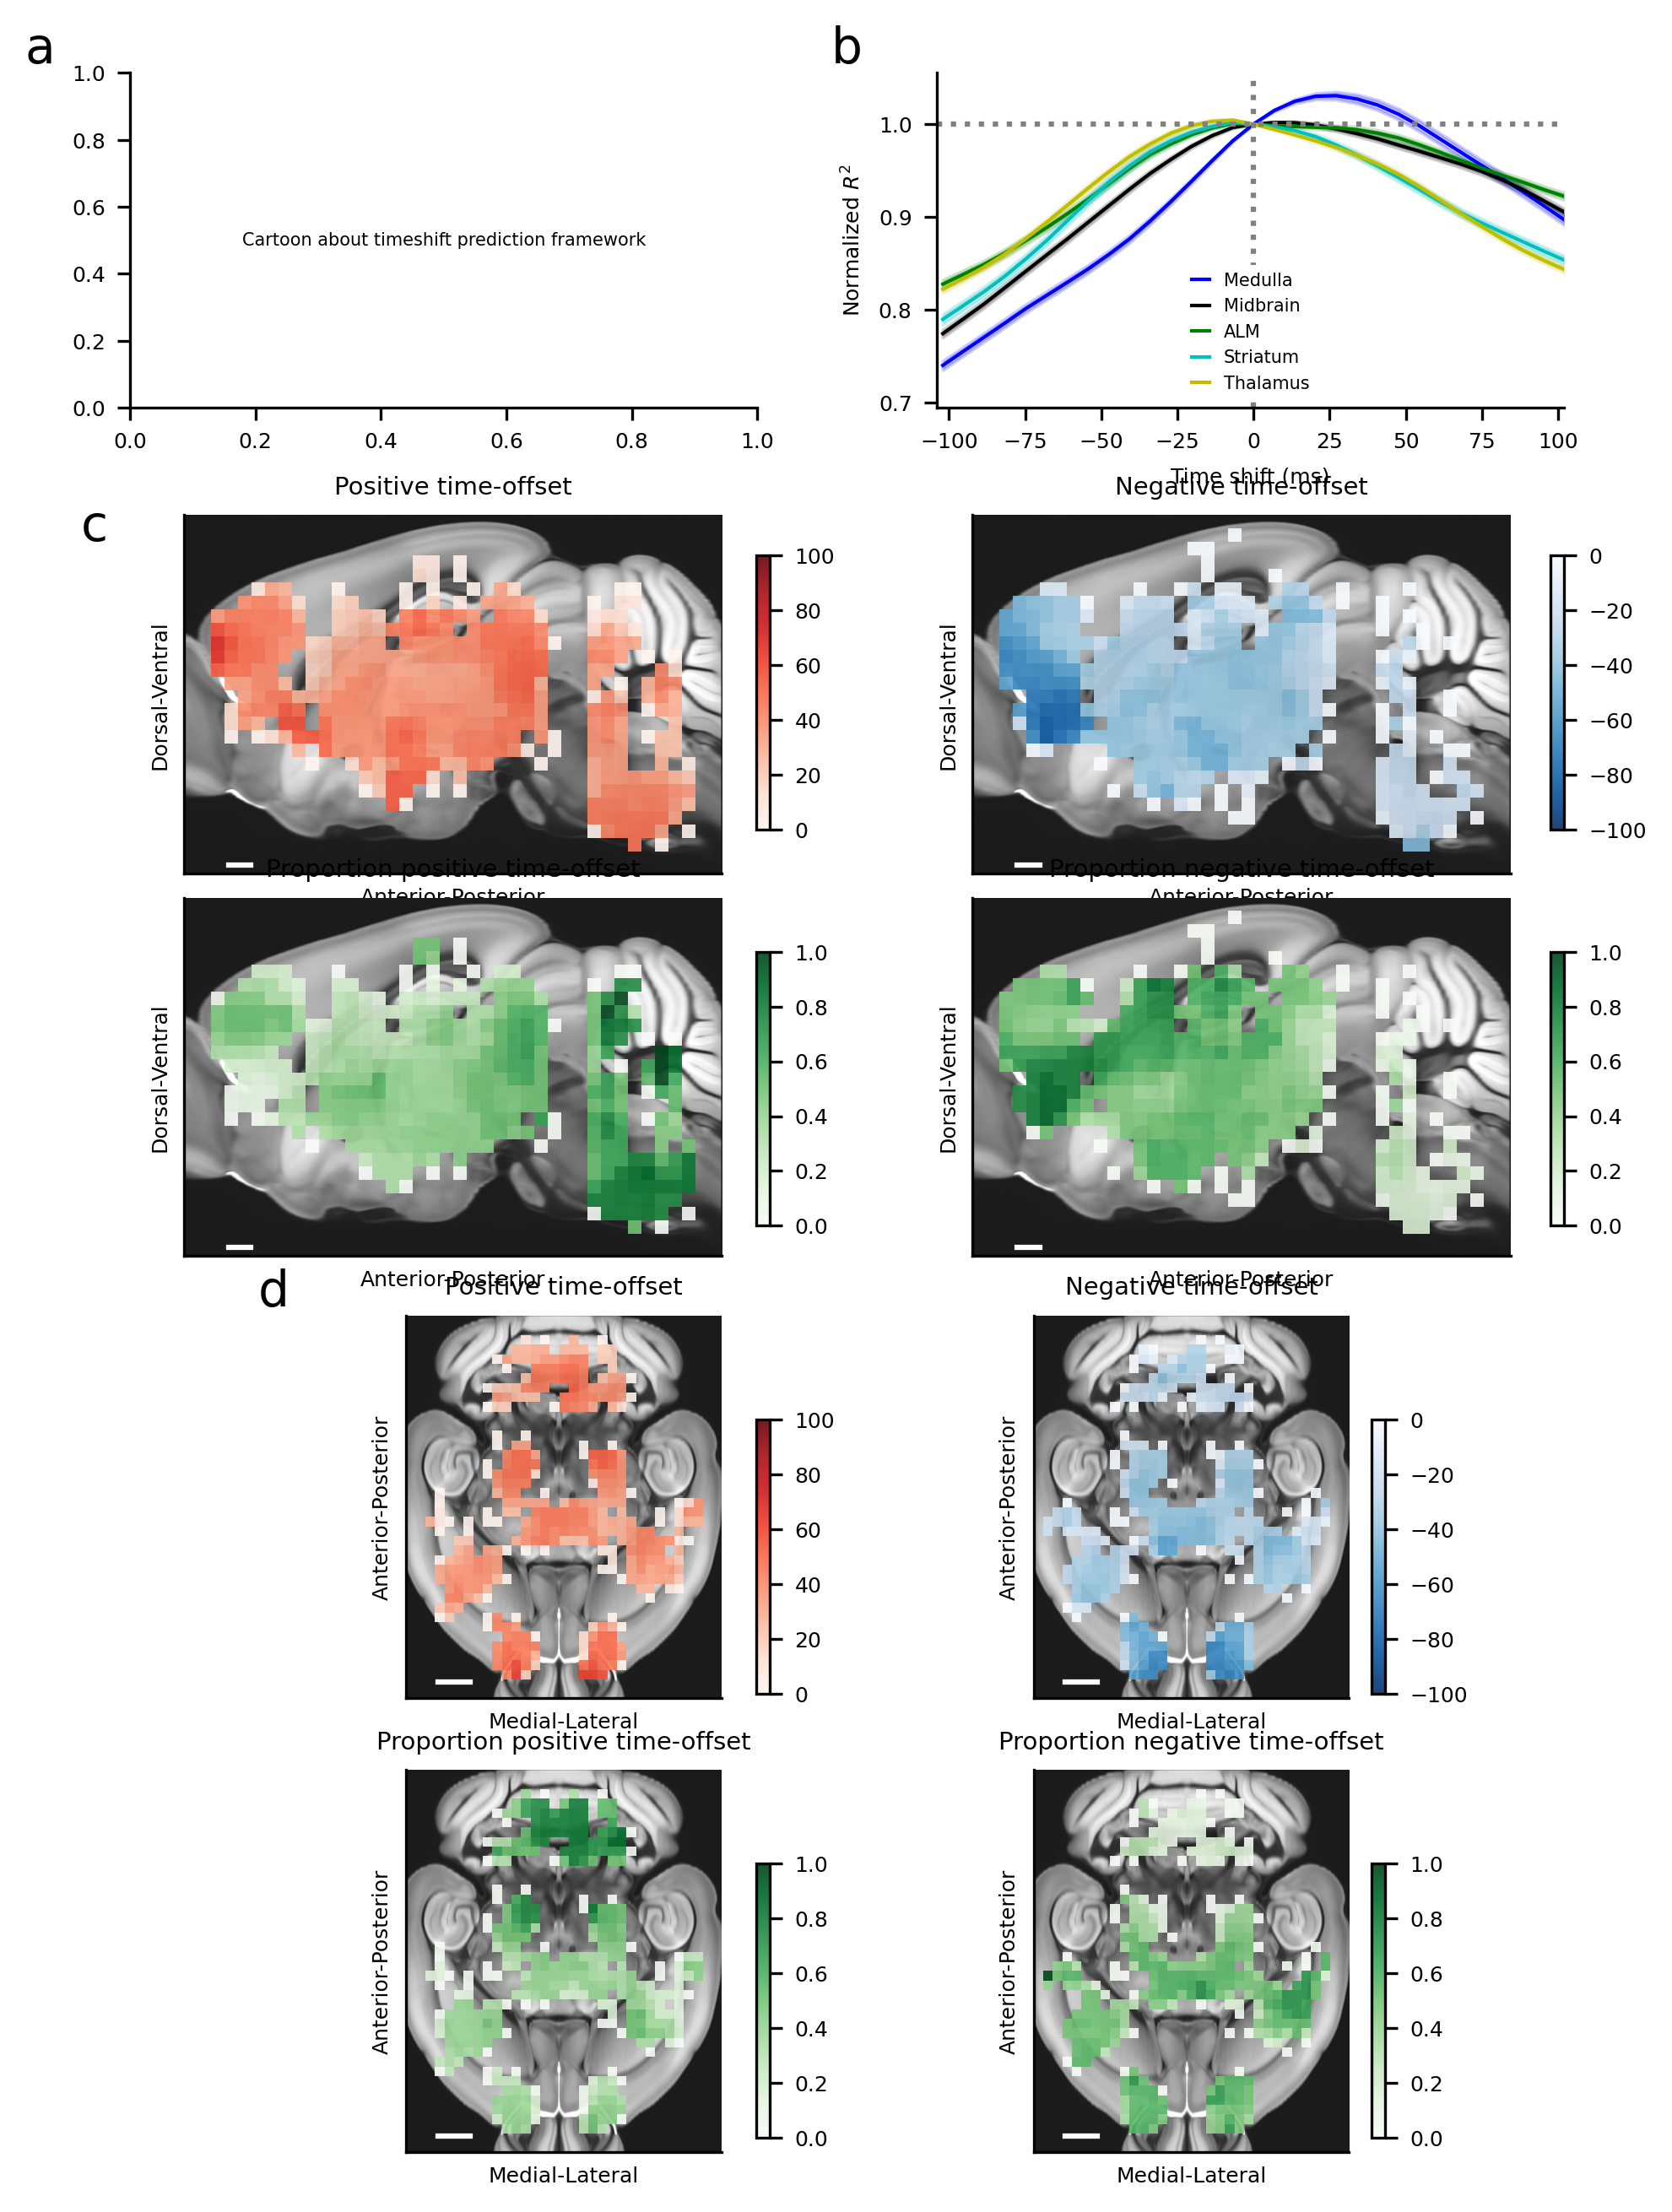

In [4]:
fig3.plot_fig3_main()
#plt.savefig(main_figfolder + 'figure3_draft.pdf', bbox_inches='tight')

Spearman correlation: 0.098, p = 0.00139, n=1059


(0.09813365820981772, 0.0013865236763194579)

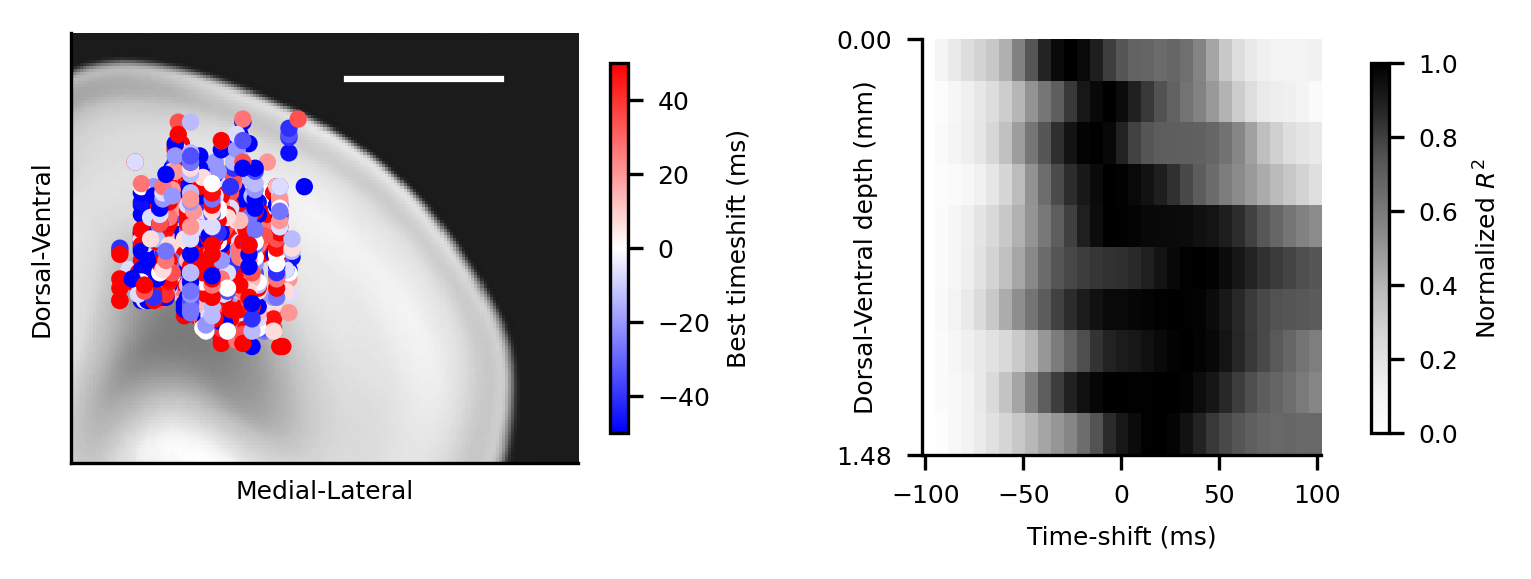

In [5]:
fig3.plot_alm_depth_supplementary()
#plt.savefig(supplementary_figfolder + 'figure3_alm_depth_supplementary.pdf', bbox_inches='tight')
fig3.get_alm_depth_stats()

<Axes: title={'center': 'ALM average time-offset'}, xlabel='Medial-Lateral', ylabel='Dorsal-Ventral'>

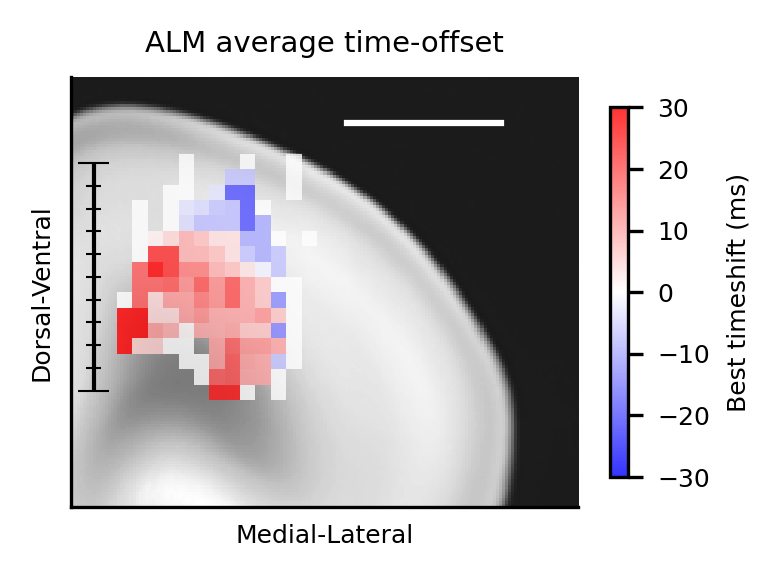

In [6]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_alm_best_timeshift_heatmap(fig, ax1, filter_size = 3)

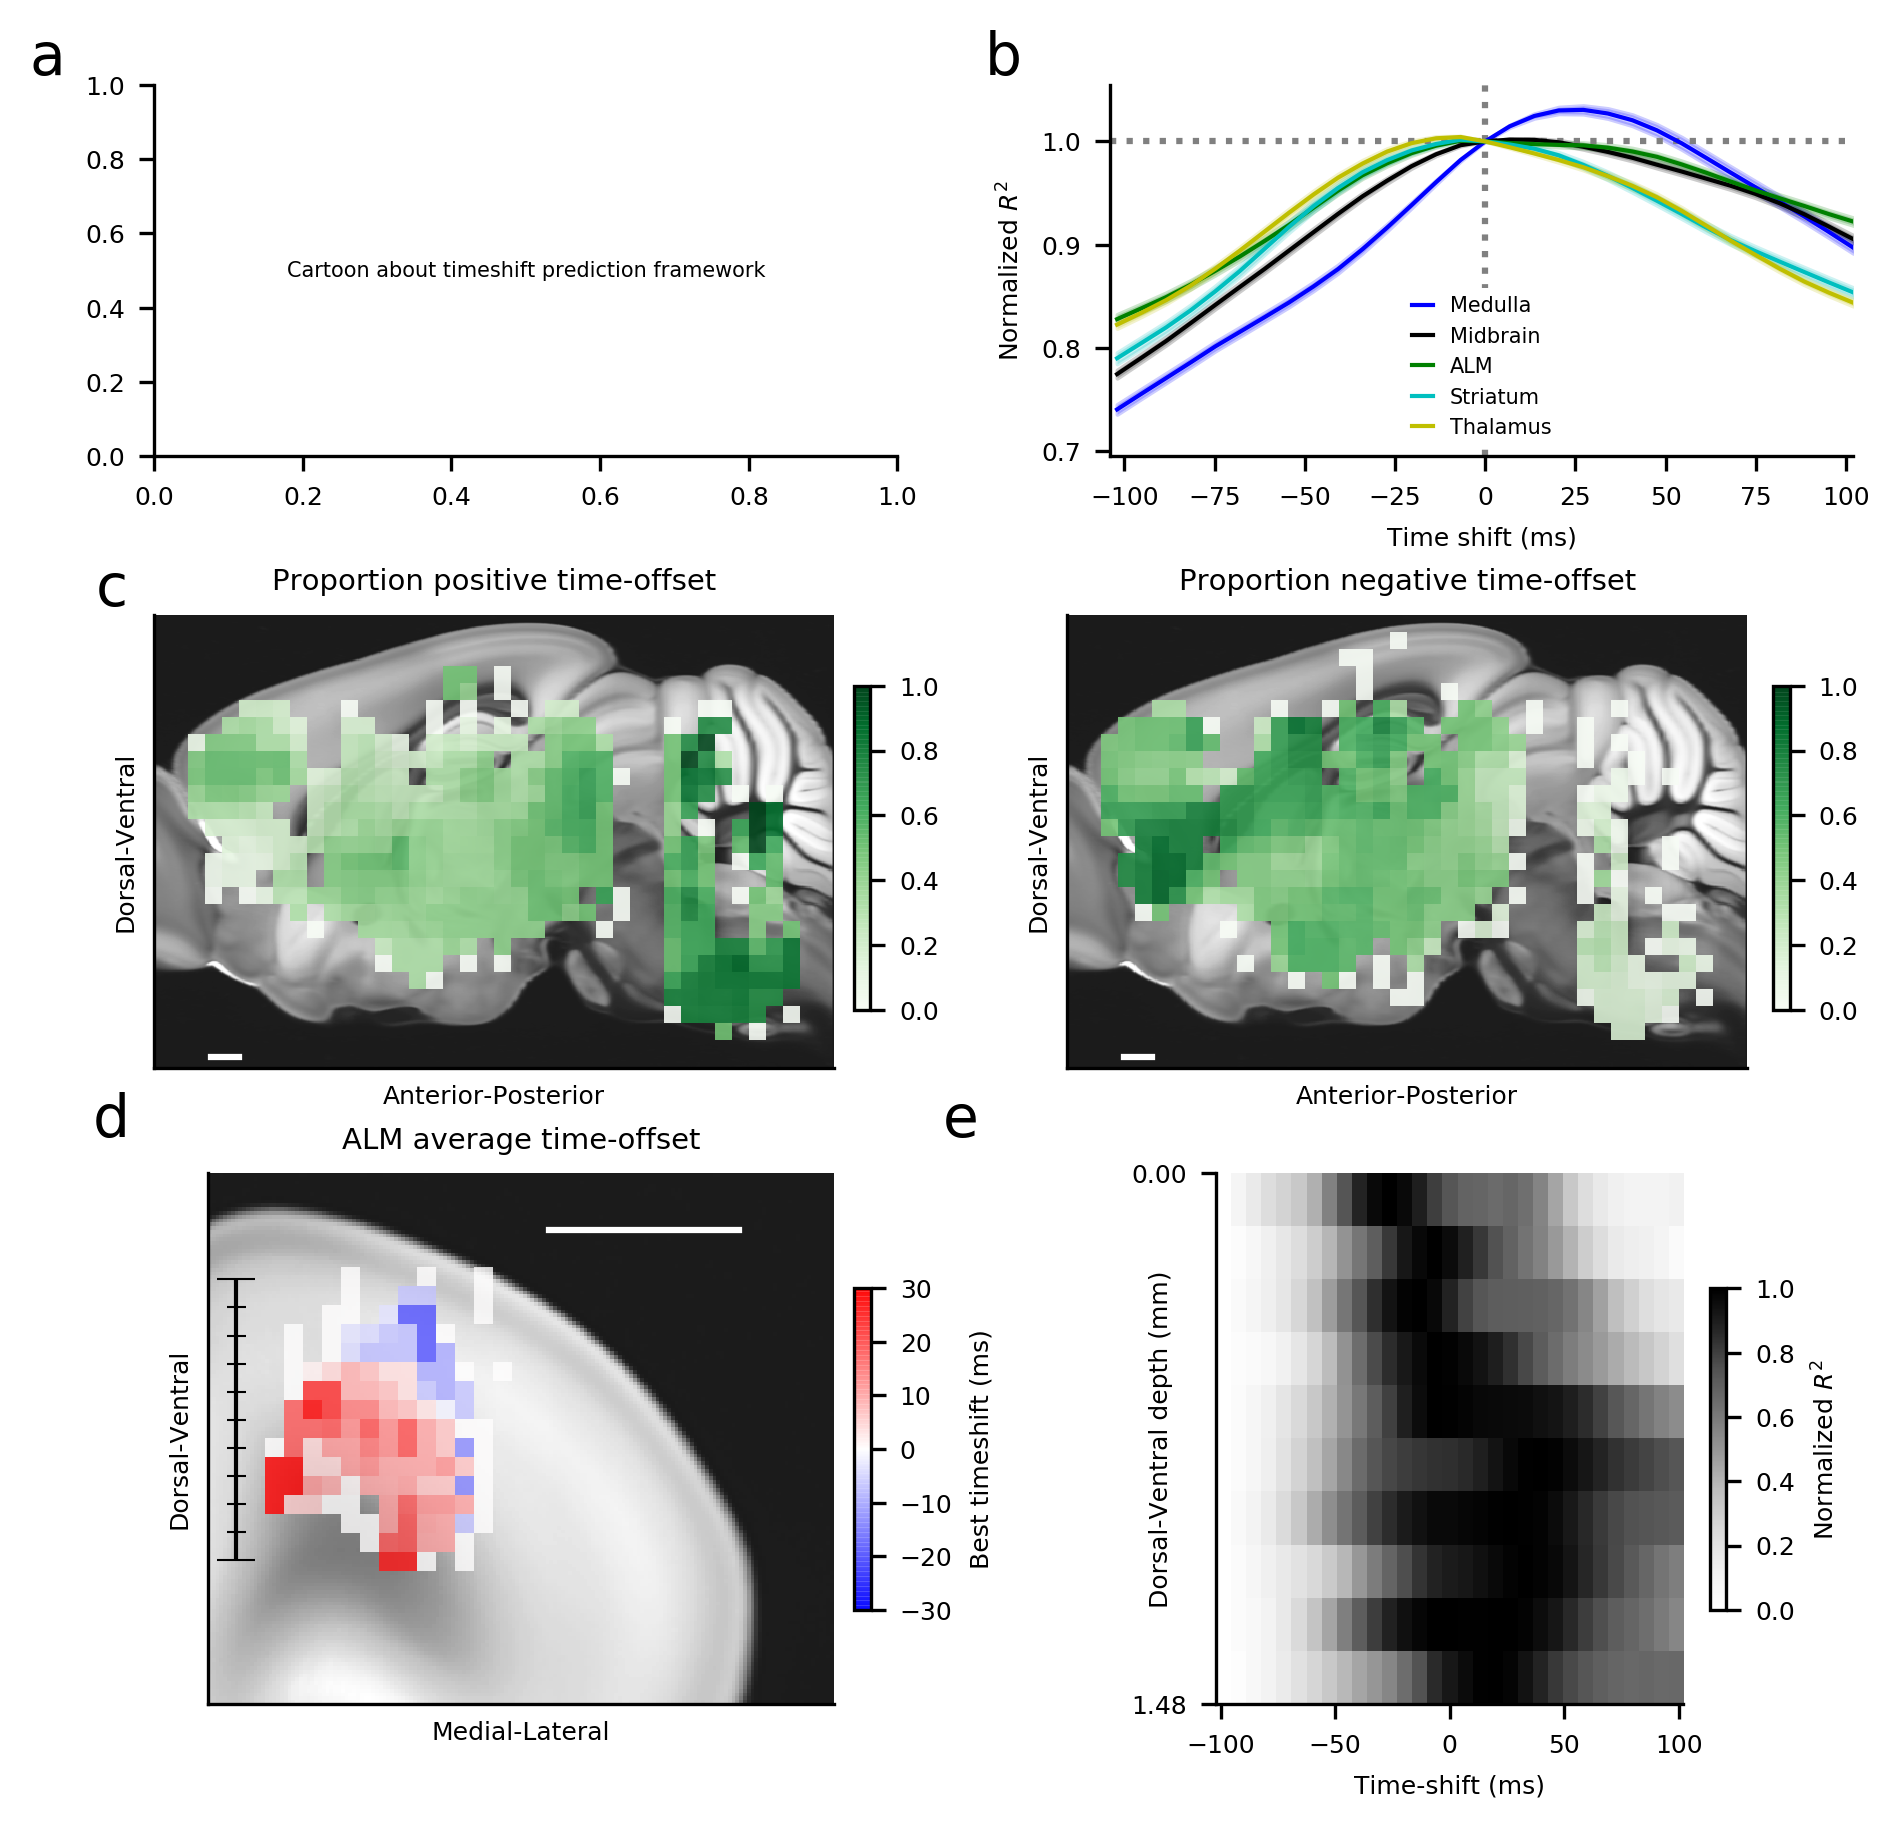

In [8]:
fig3.plot_fig3_main_v2()
#plt.savefig(main_figfolder + 'figure3_draft_v2.png',dpi = 300, bbox_inches='tight')

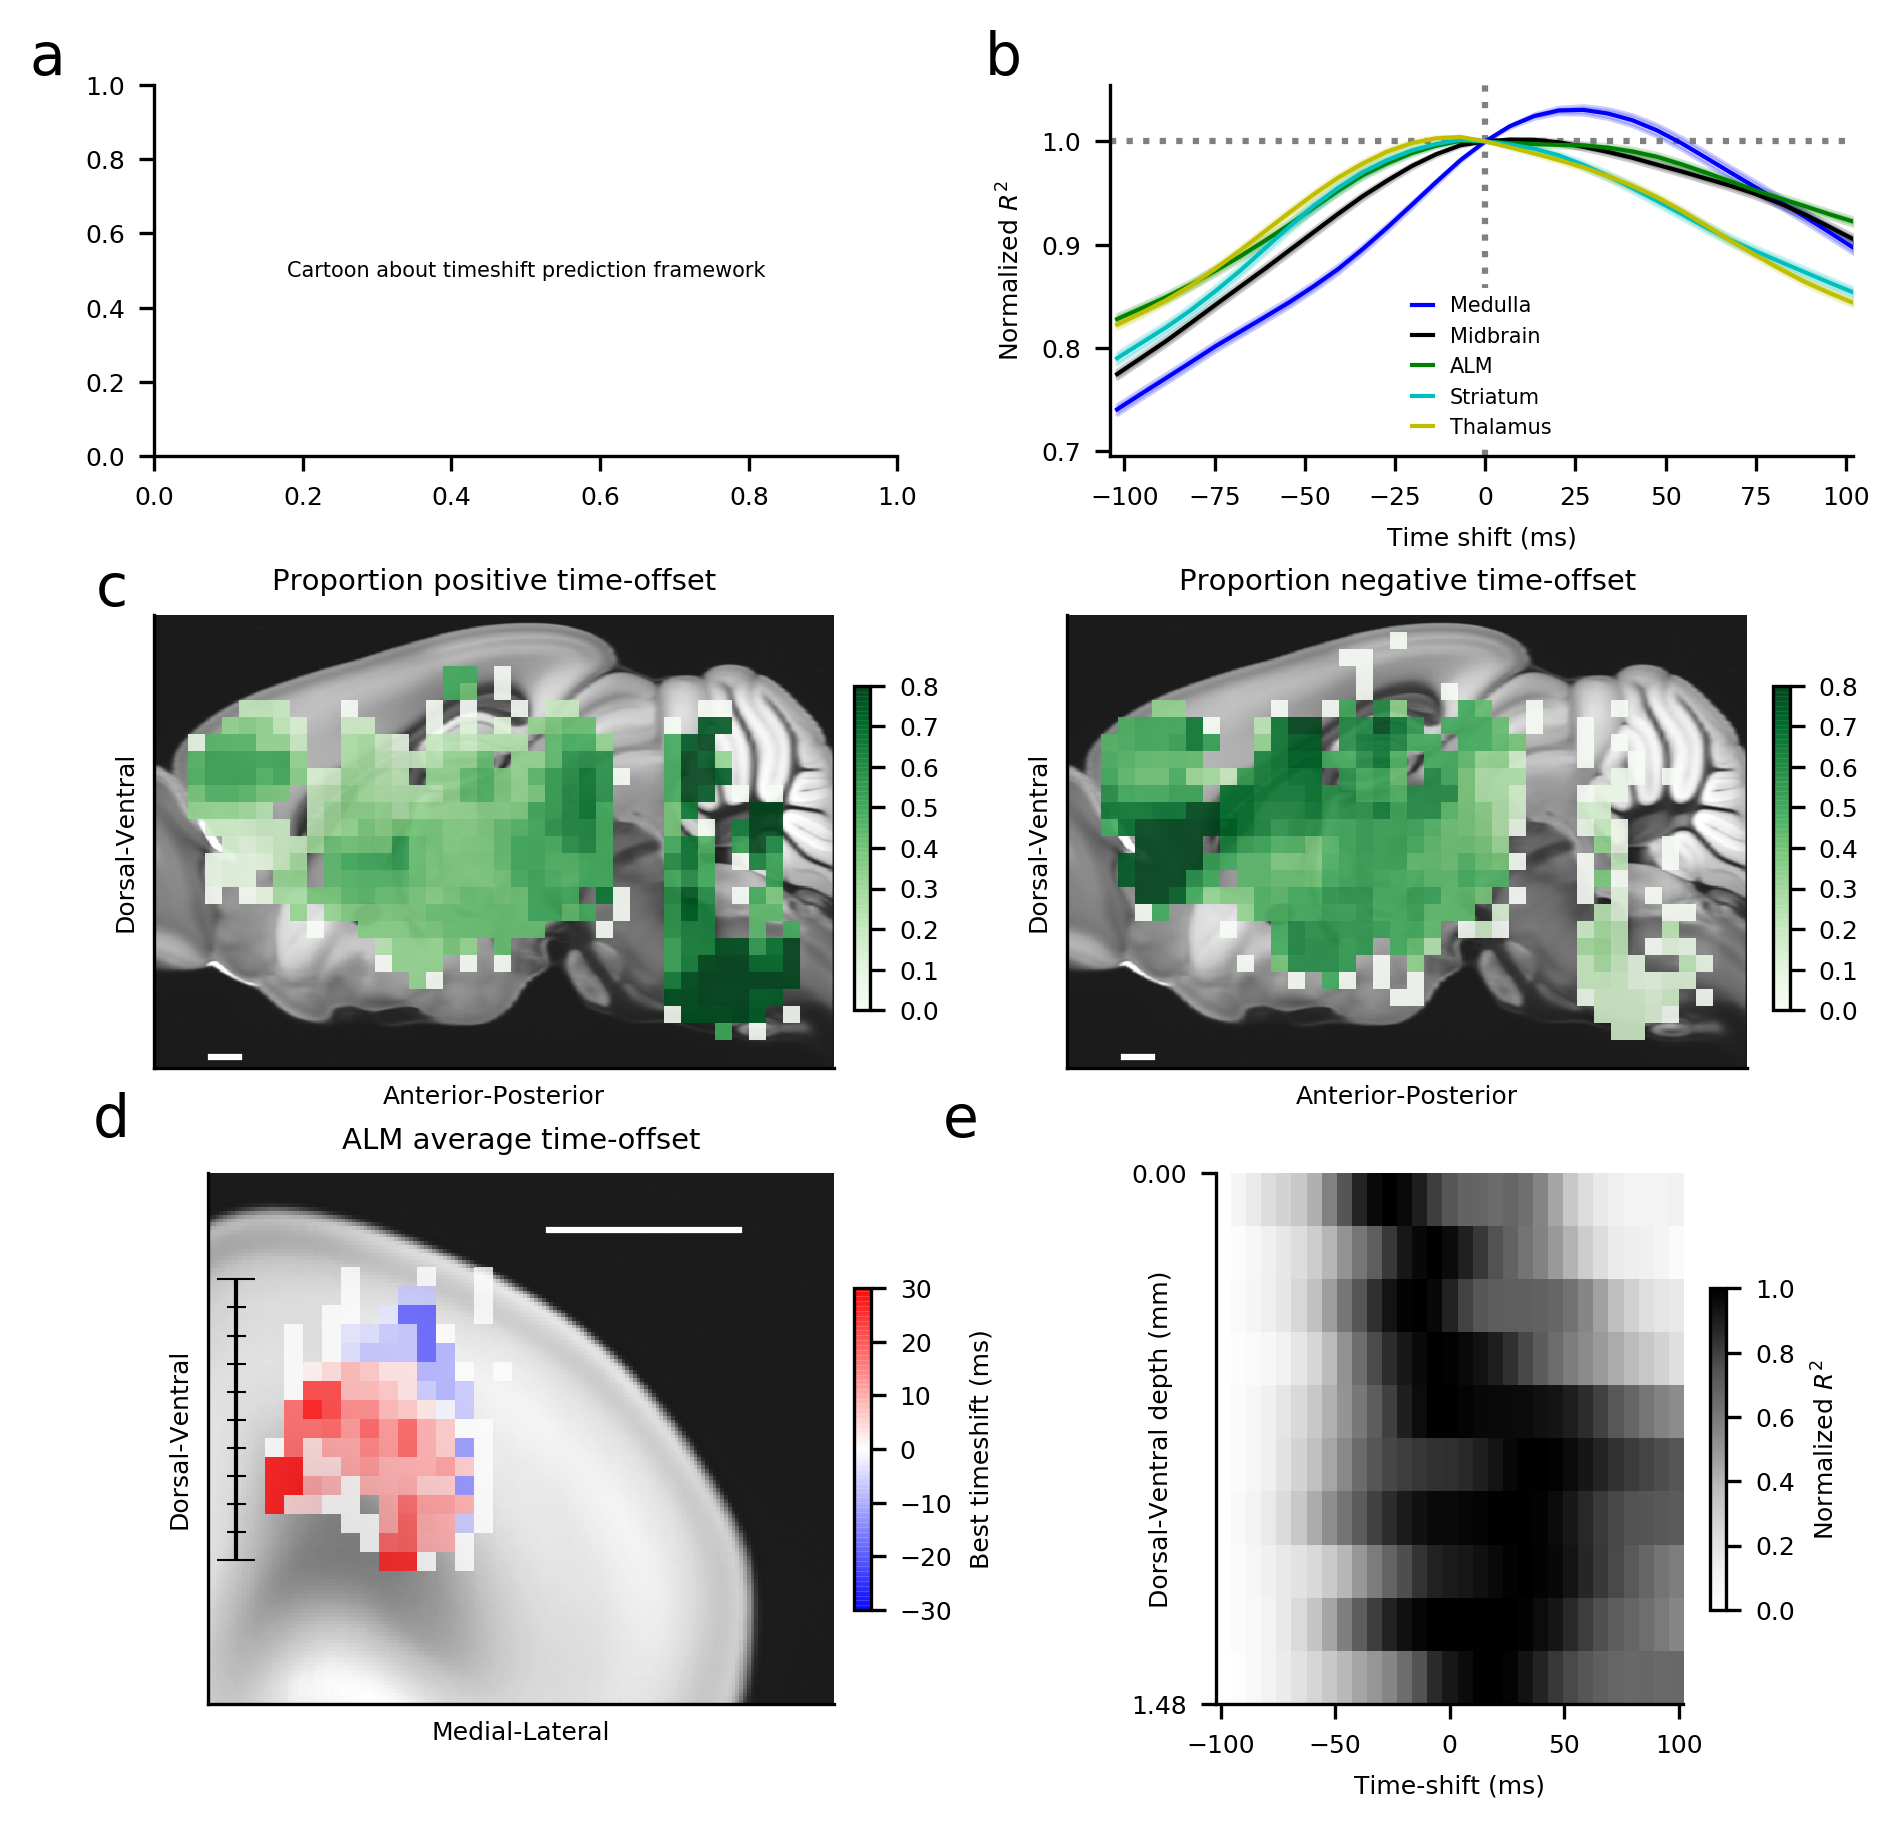

In [9]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v2()
#plt.savefig(main_figfolder + 'figure3_draft_v4.pdf',dpi = 300, bbox_inches='tight')

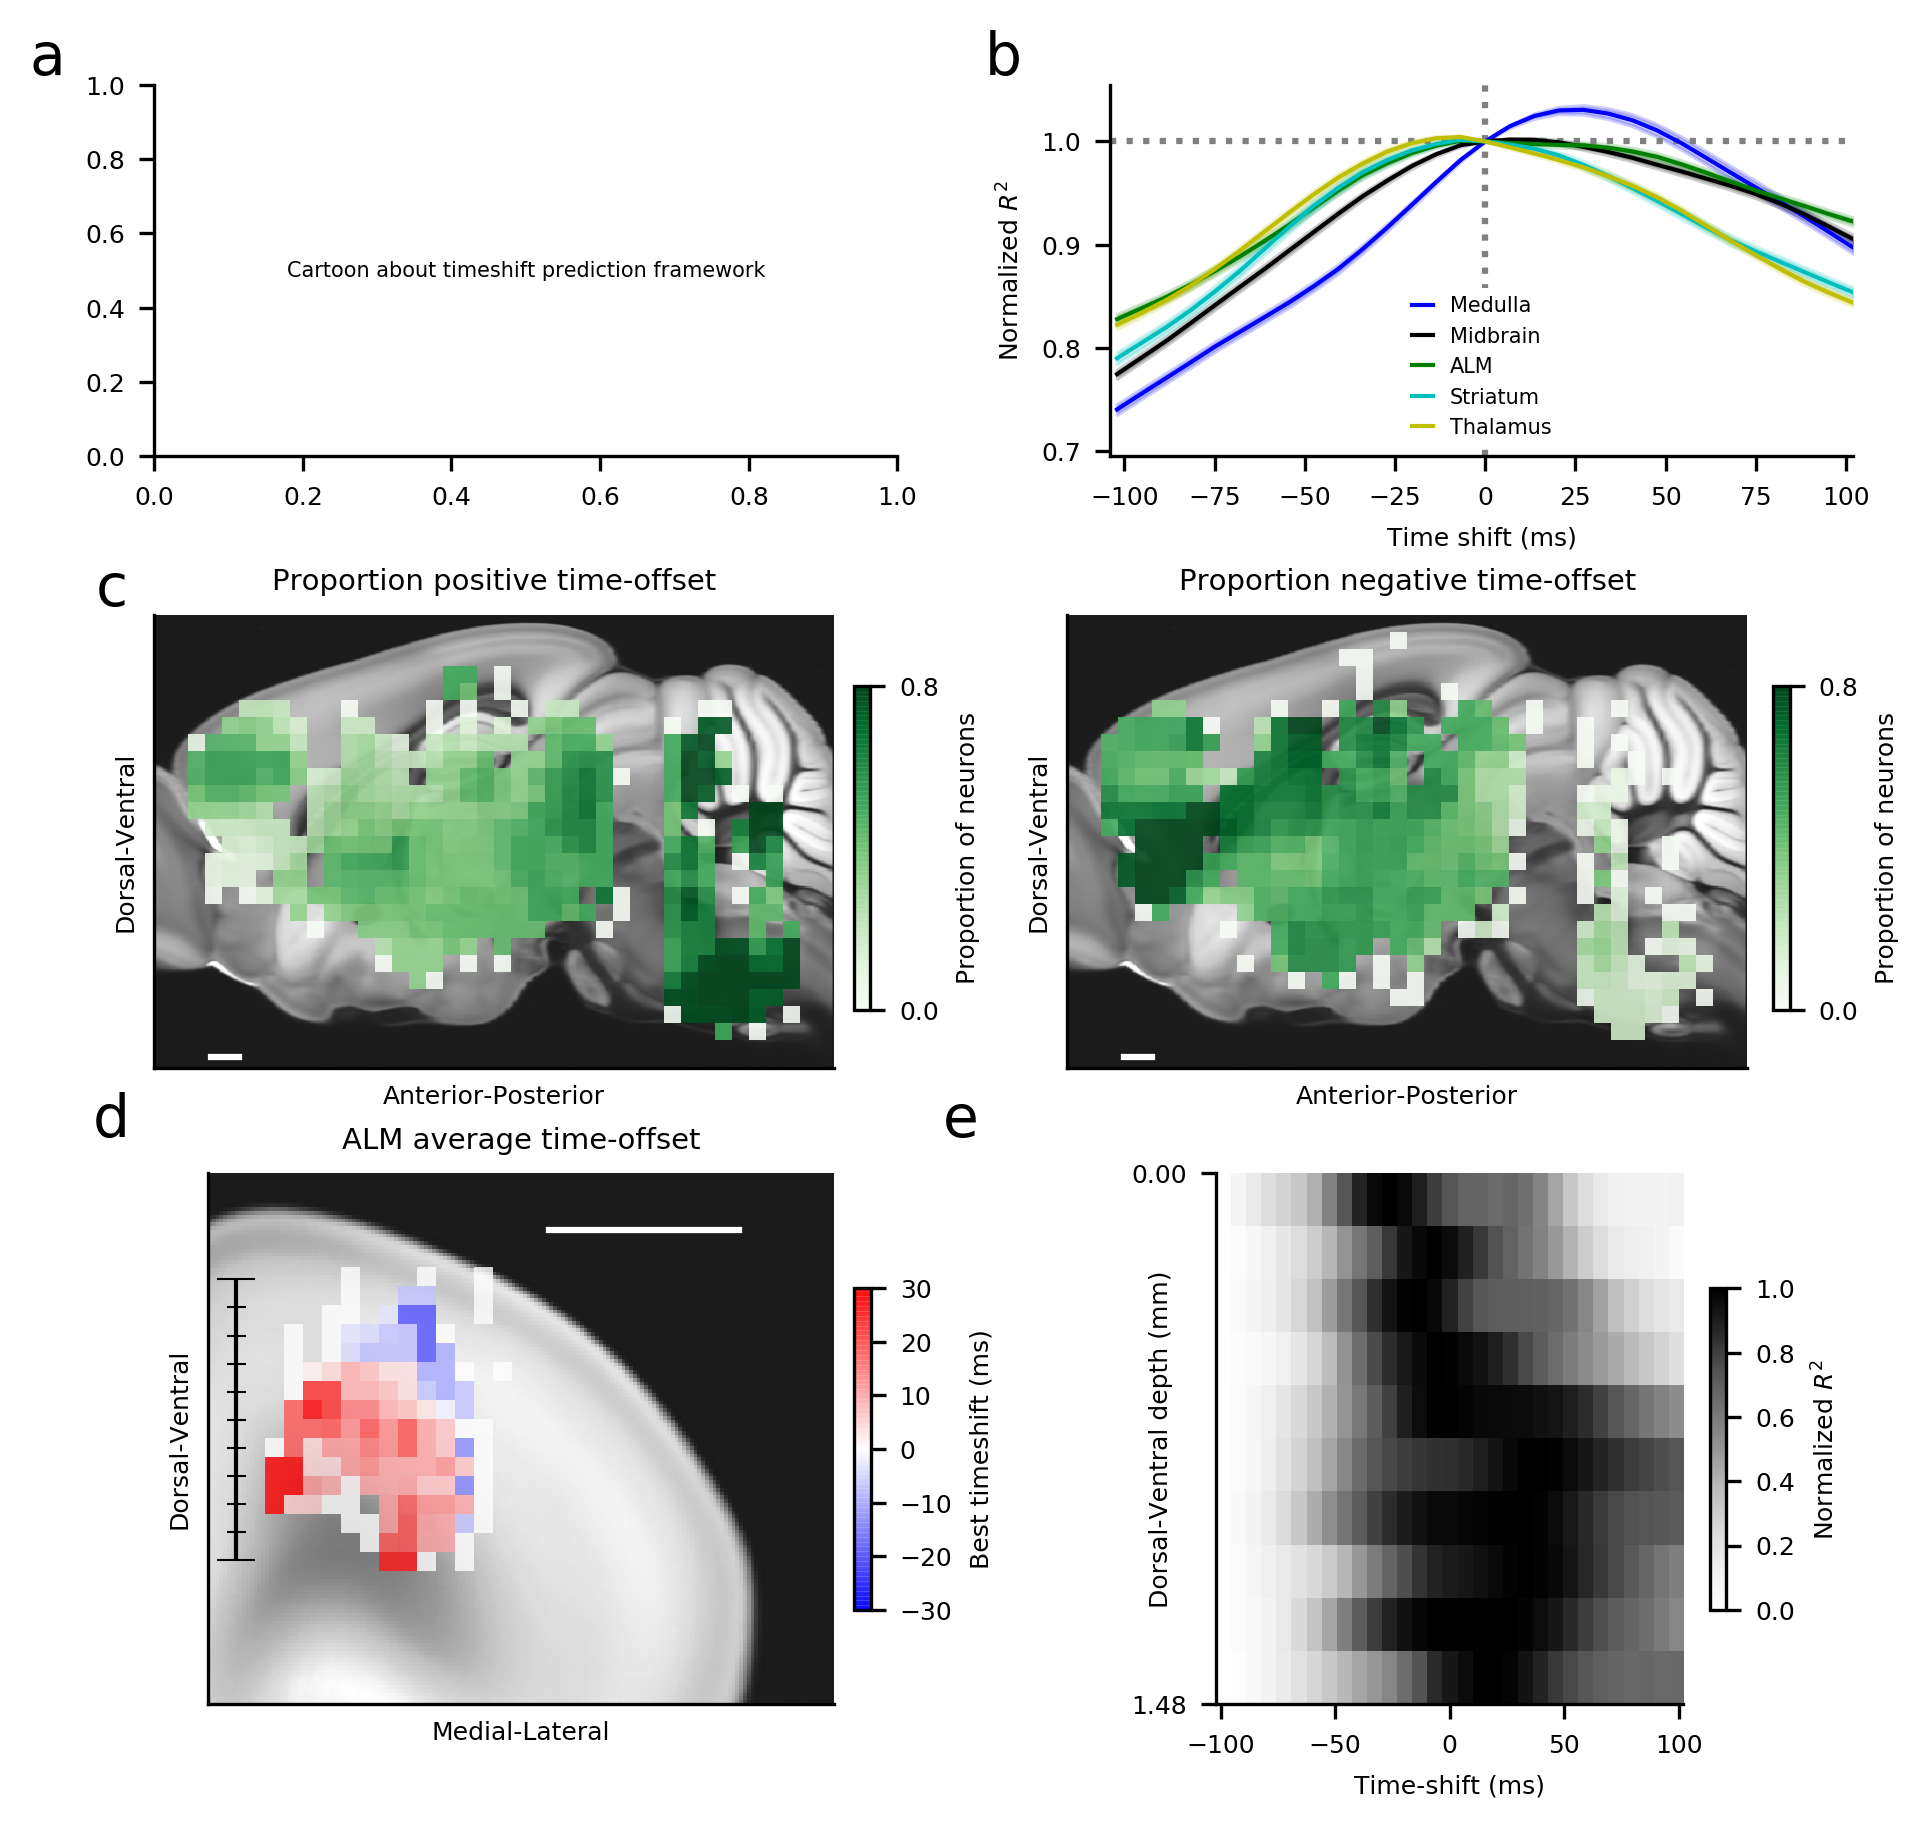

In [10]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v5()
#plt.savefig(main_figfolder + 'figure3_draft_v5.pdf',dpi = 300, bbox_inches='tight')

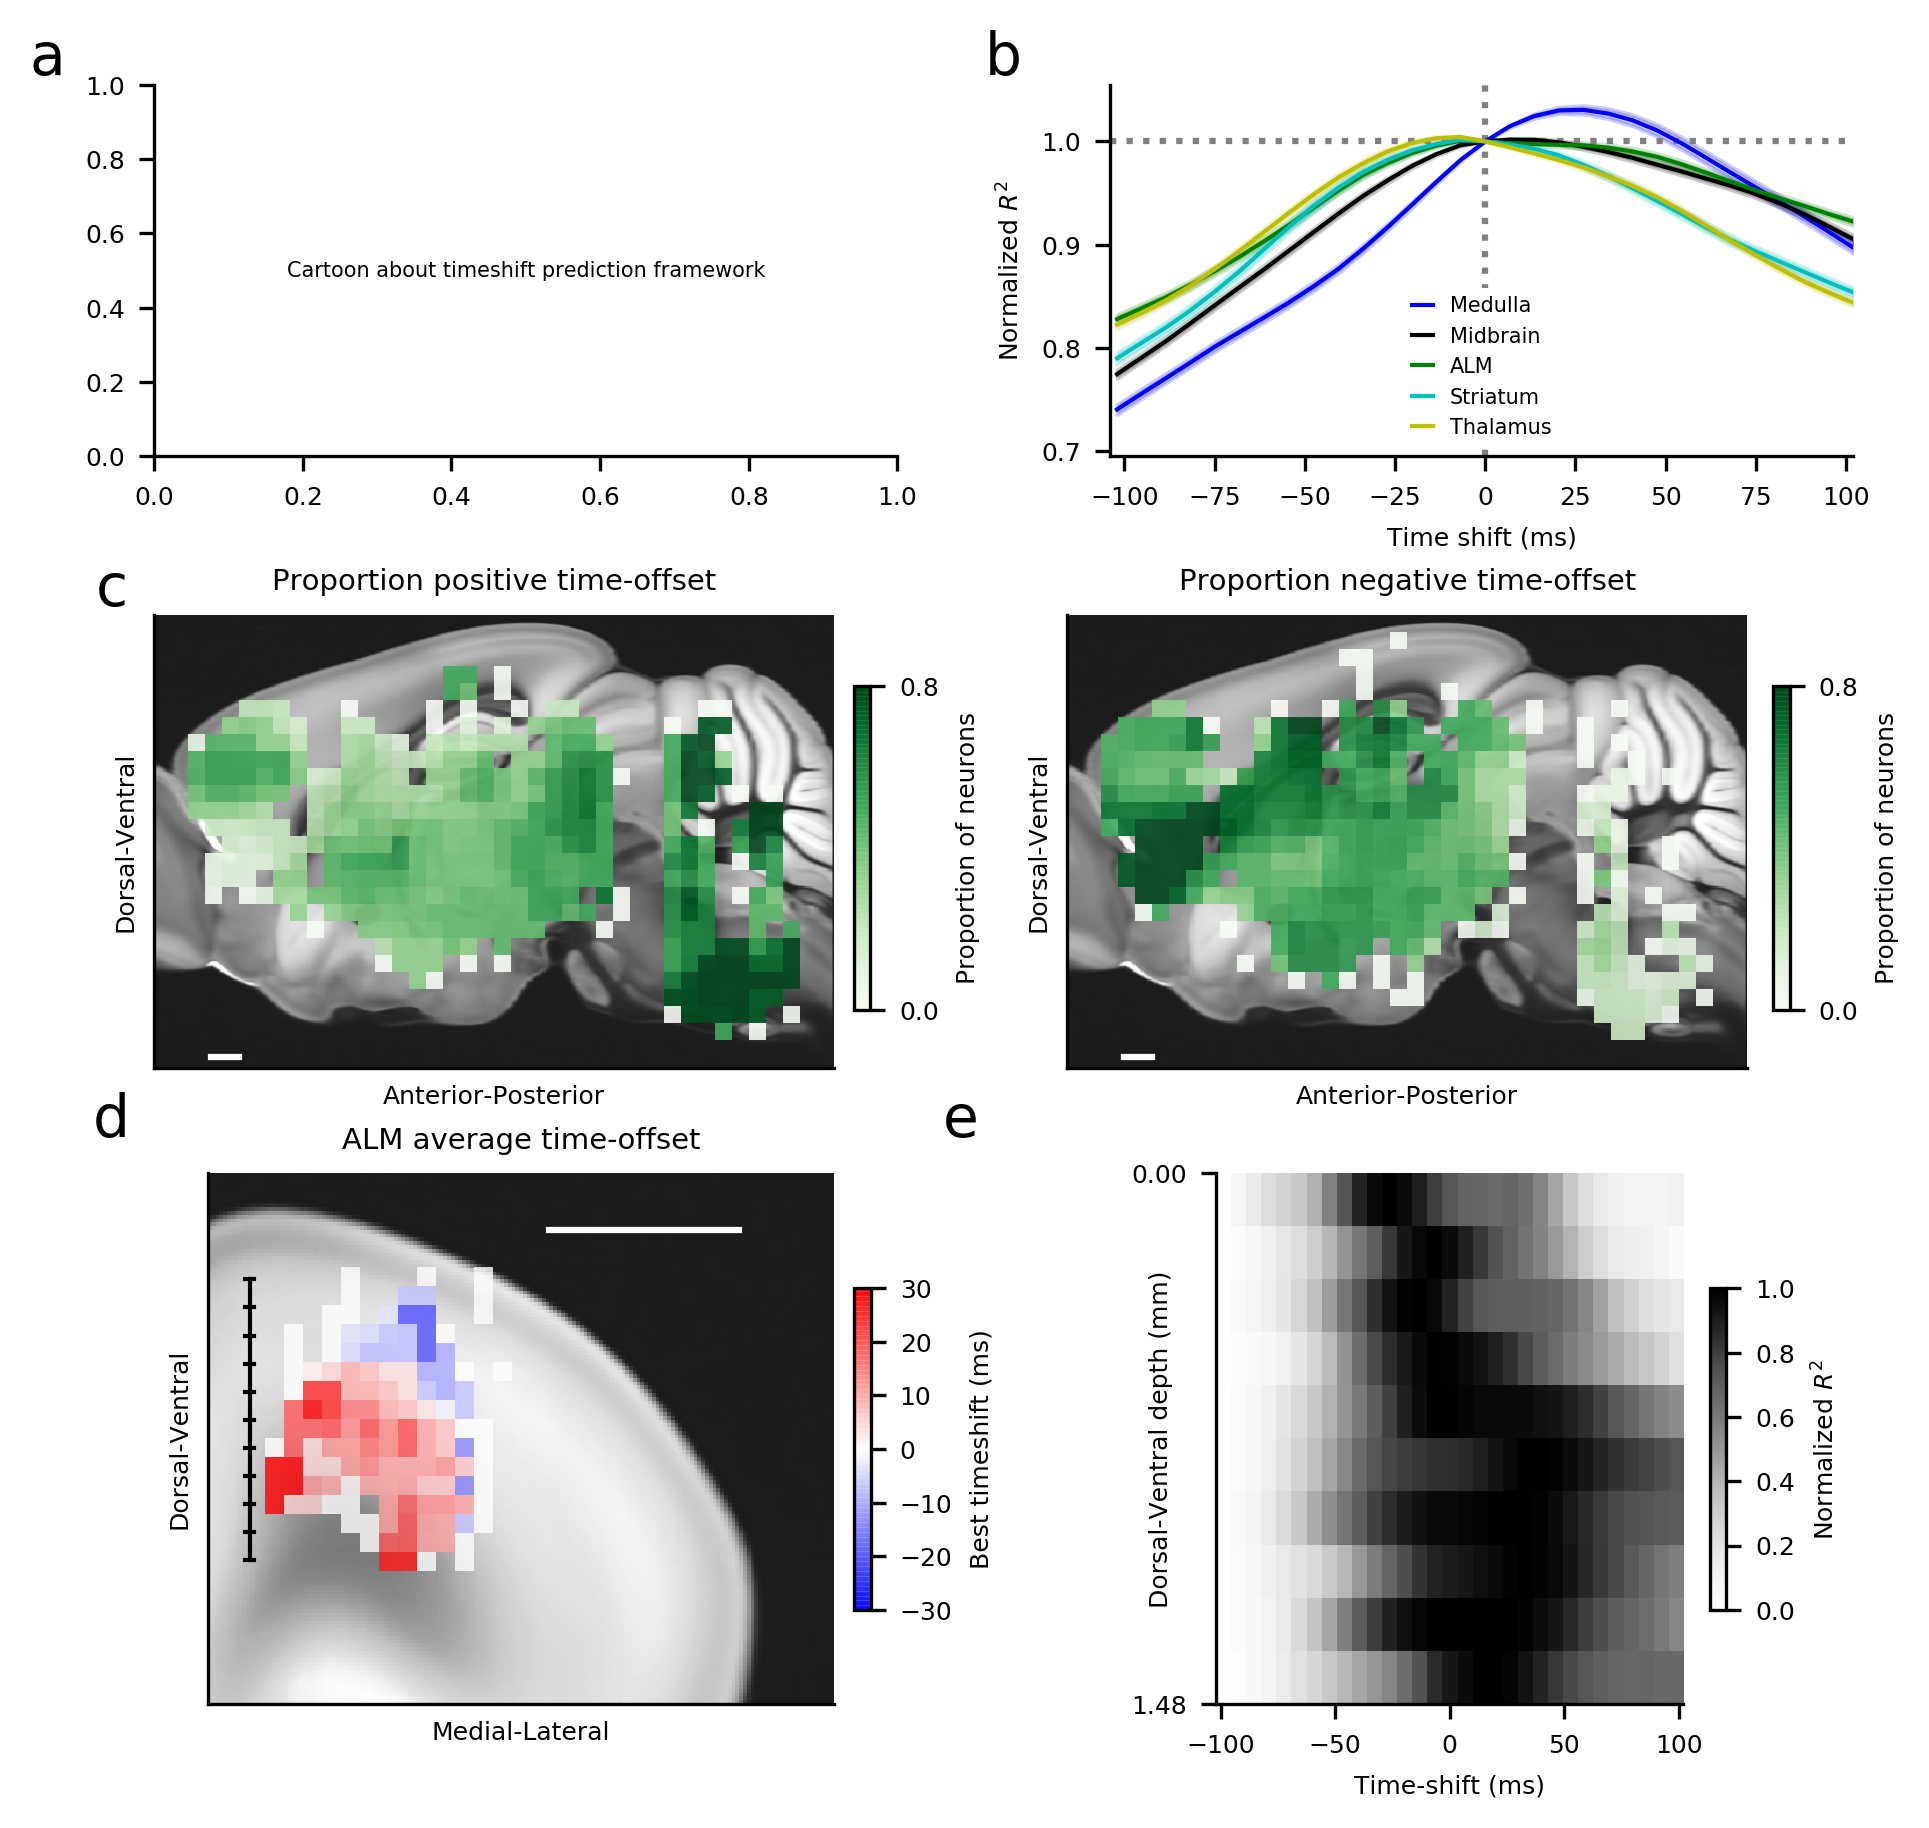

In [11]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6()
#plt.savefig(main_figfolder + 'figure3_draft_v6.pdf',dpi = 300, bbox_inches='tight')

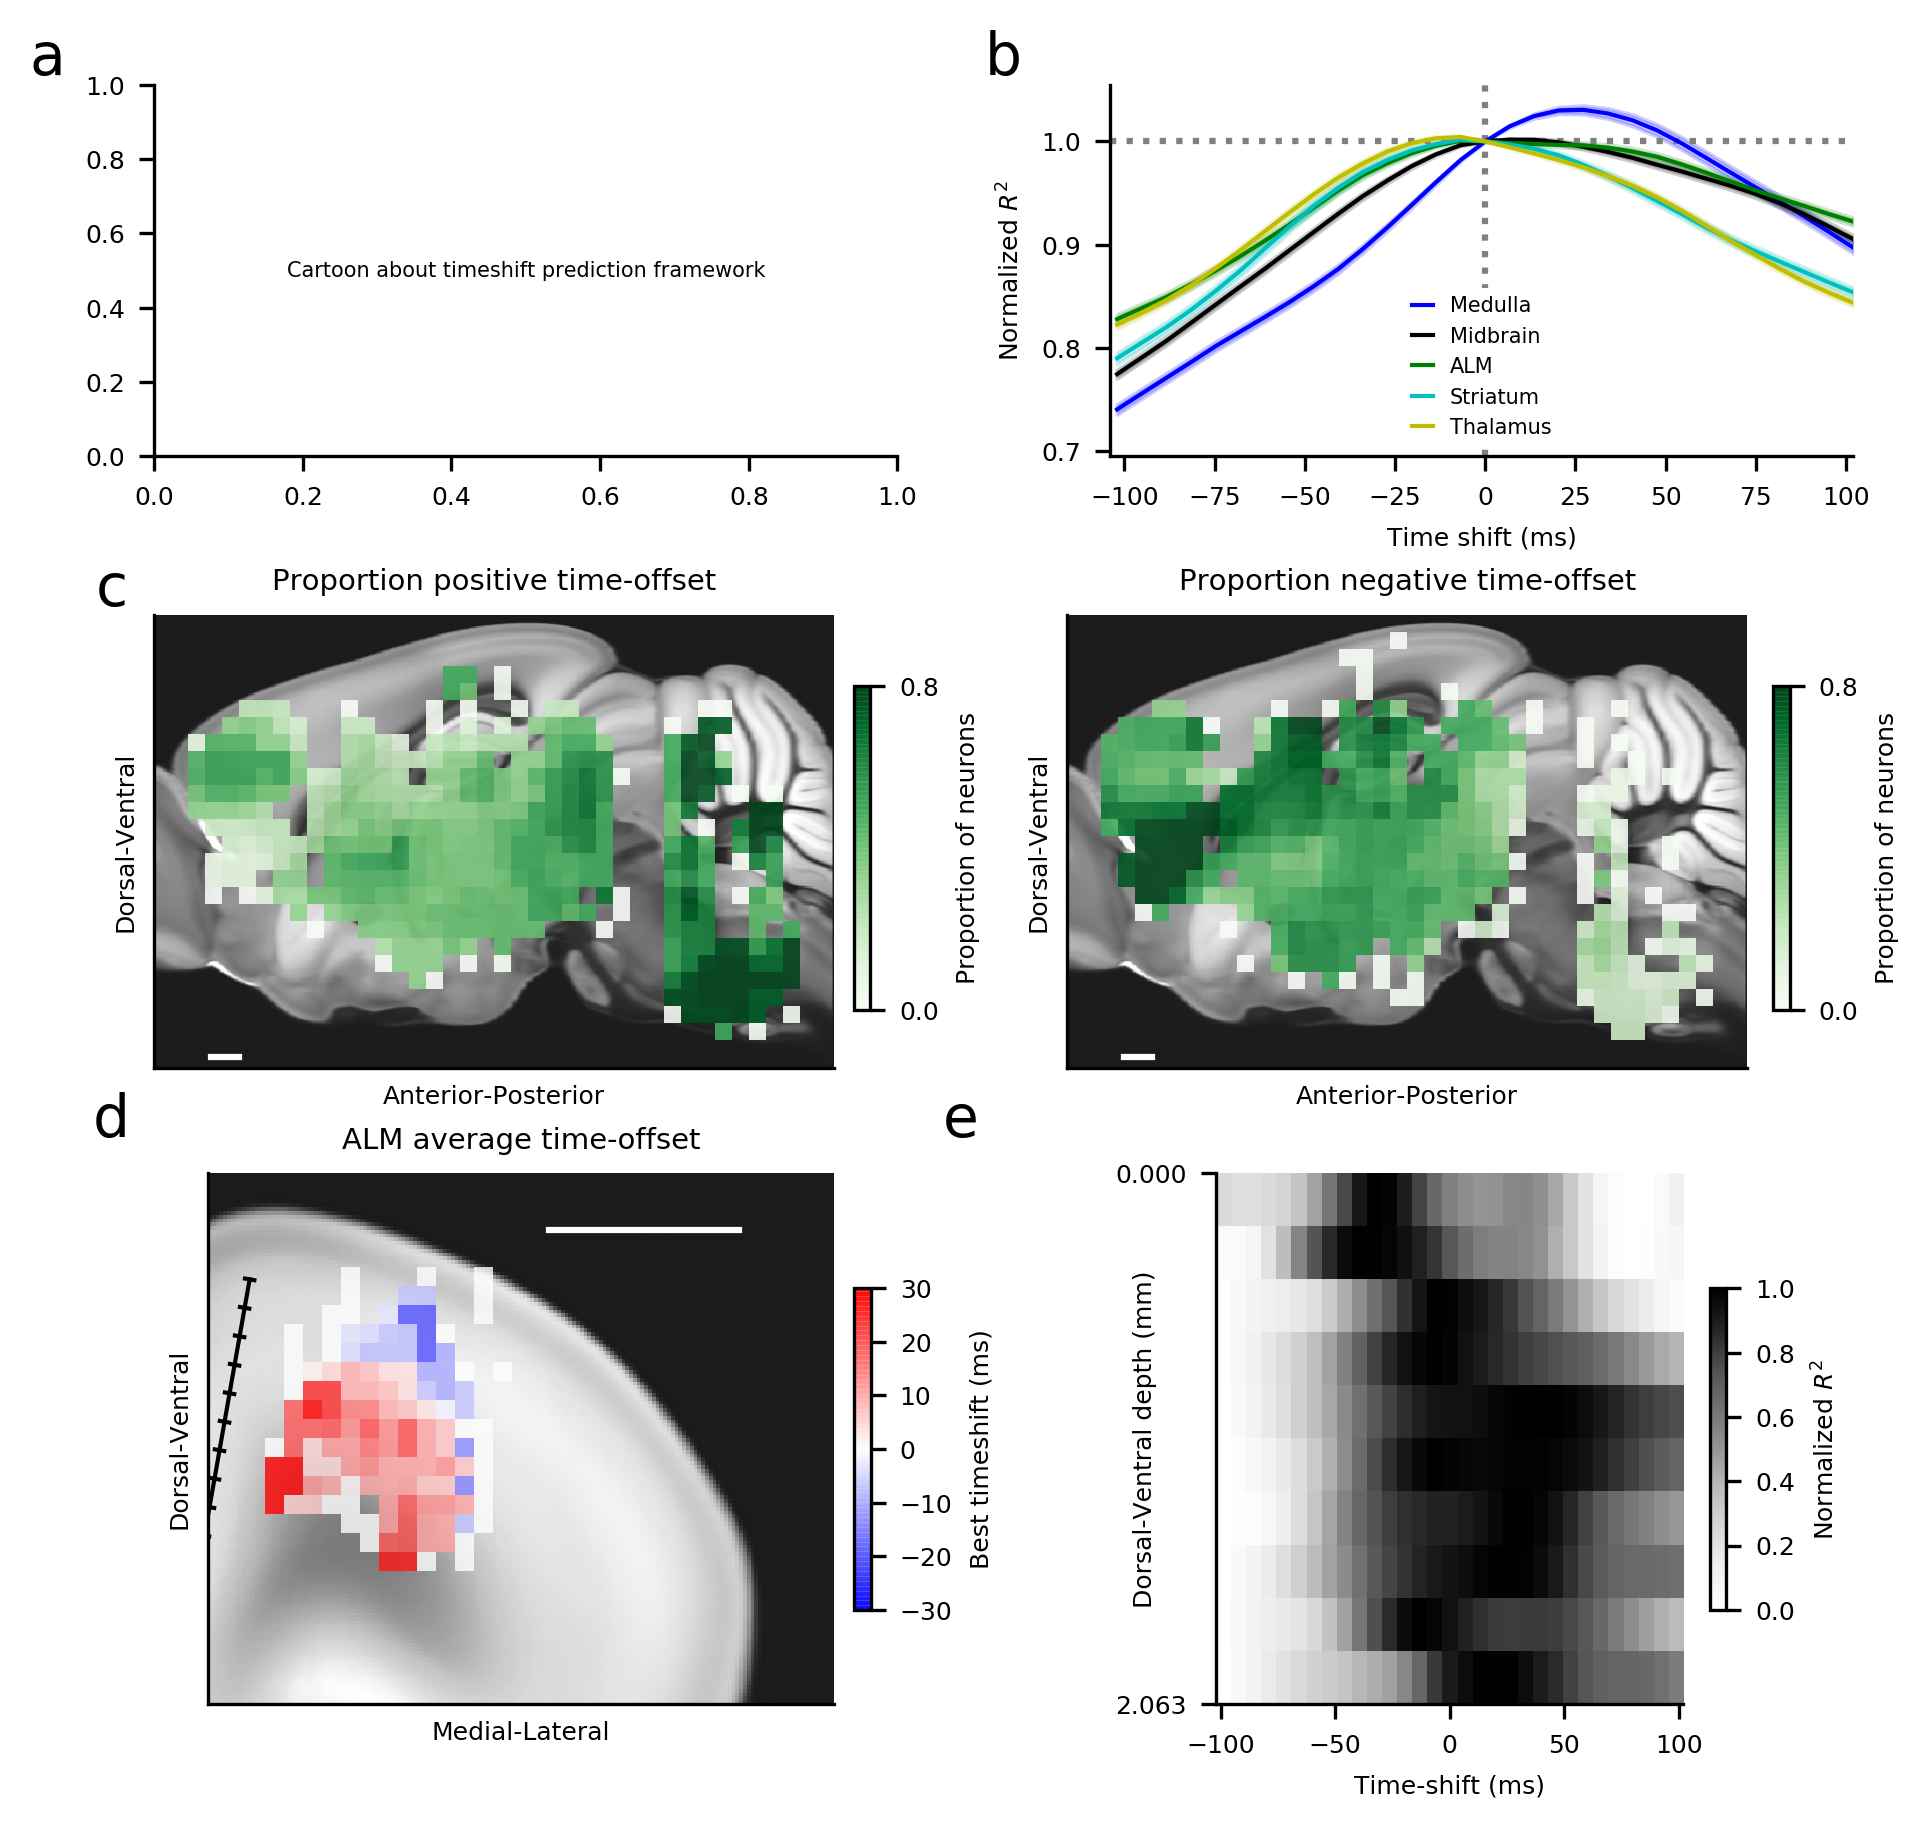

In [12]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6(alm_depth_angle= 10)
#plt.savefig(main_figfolder + 'figure3_draft_v7.pdf',dpi = 300, bbox_inches='tight')

### The final final

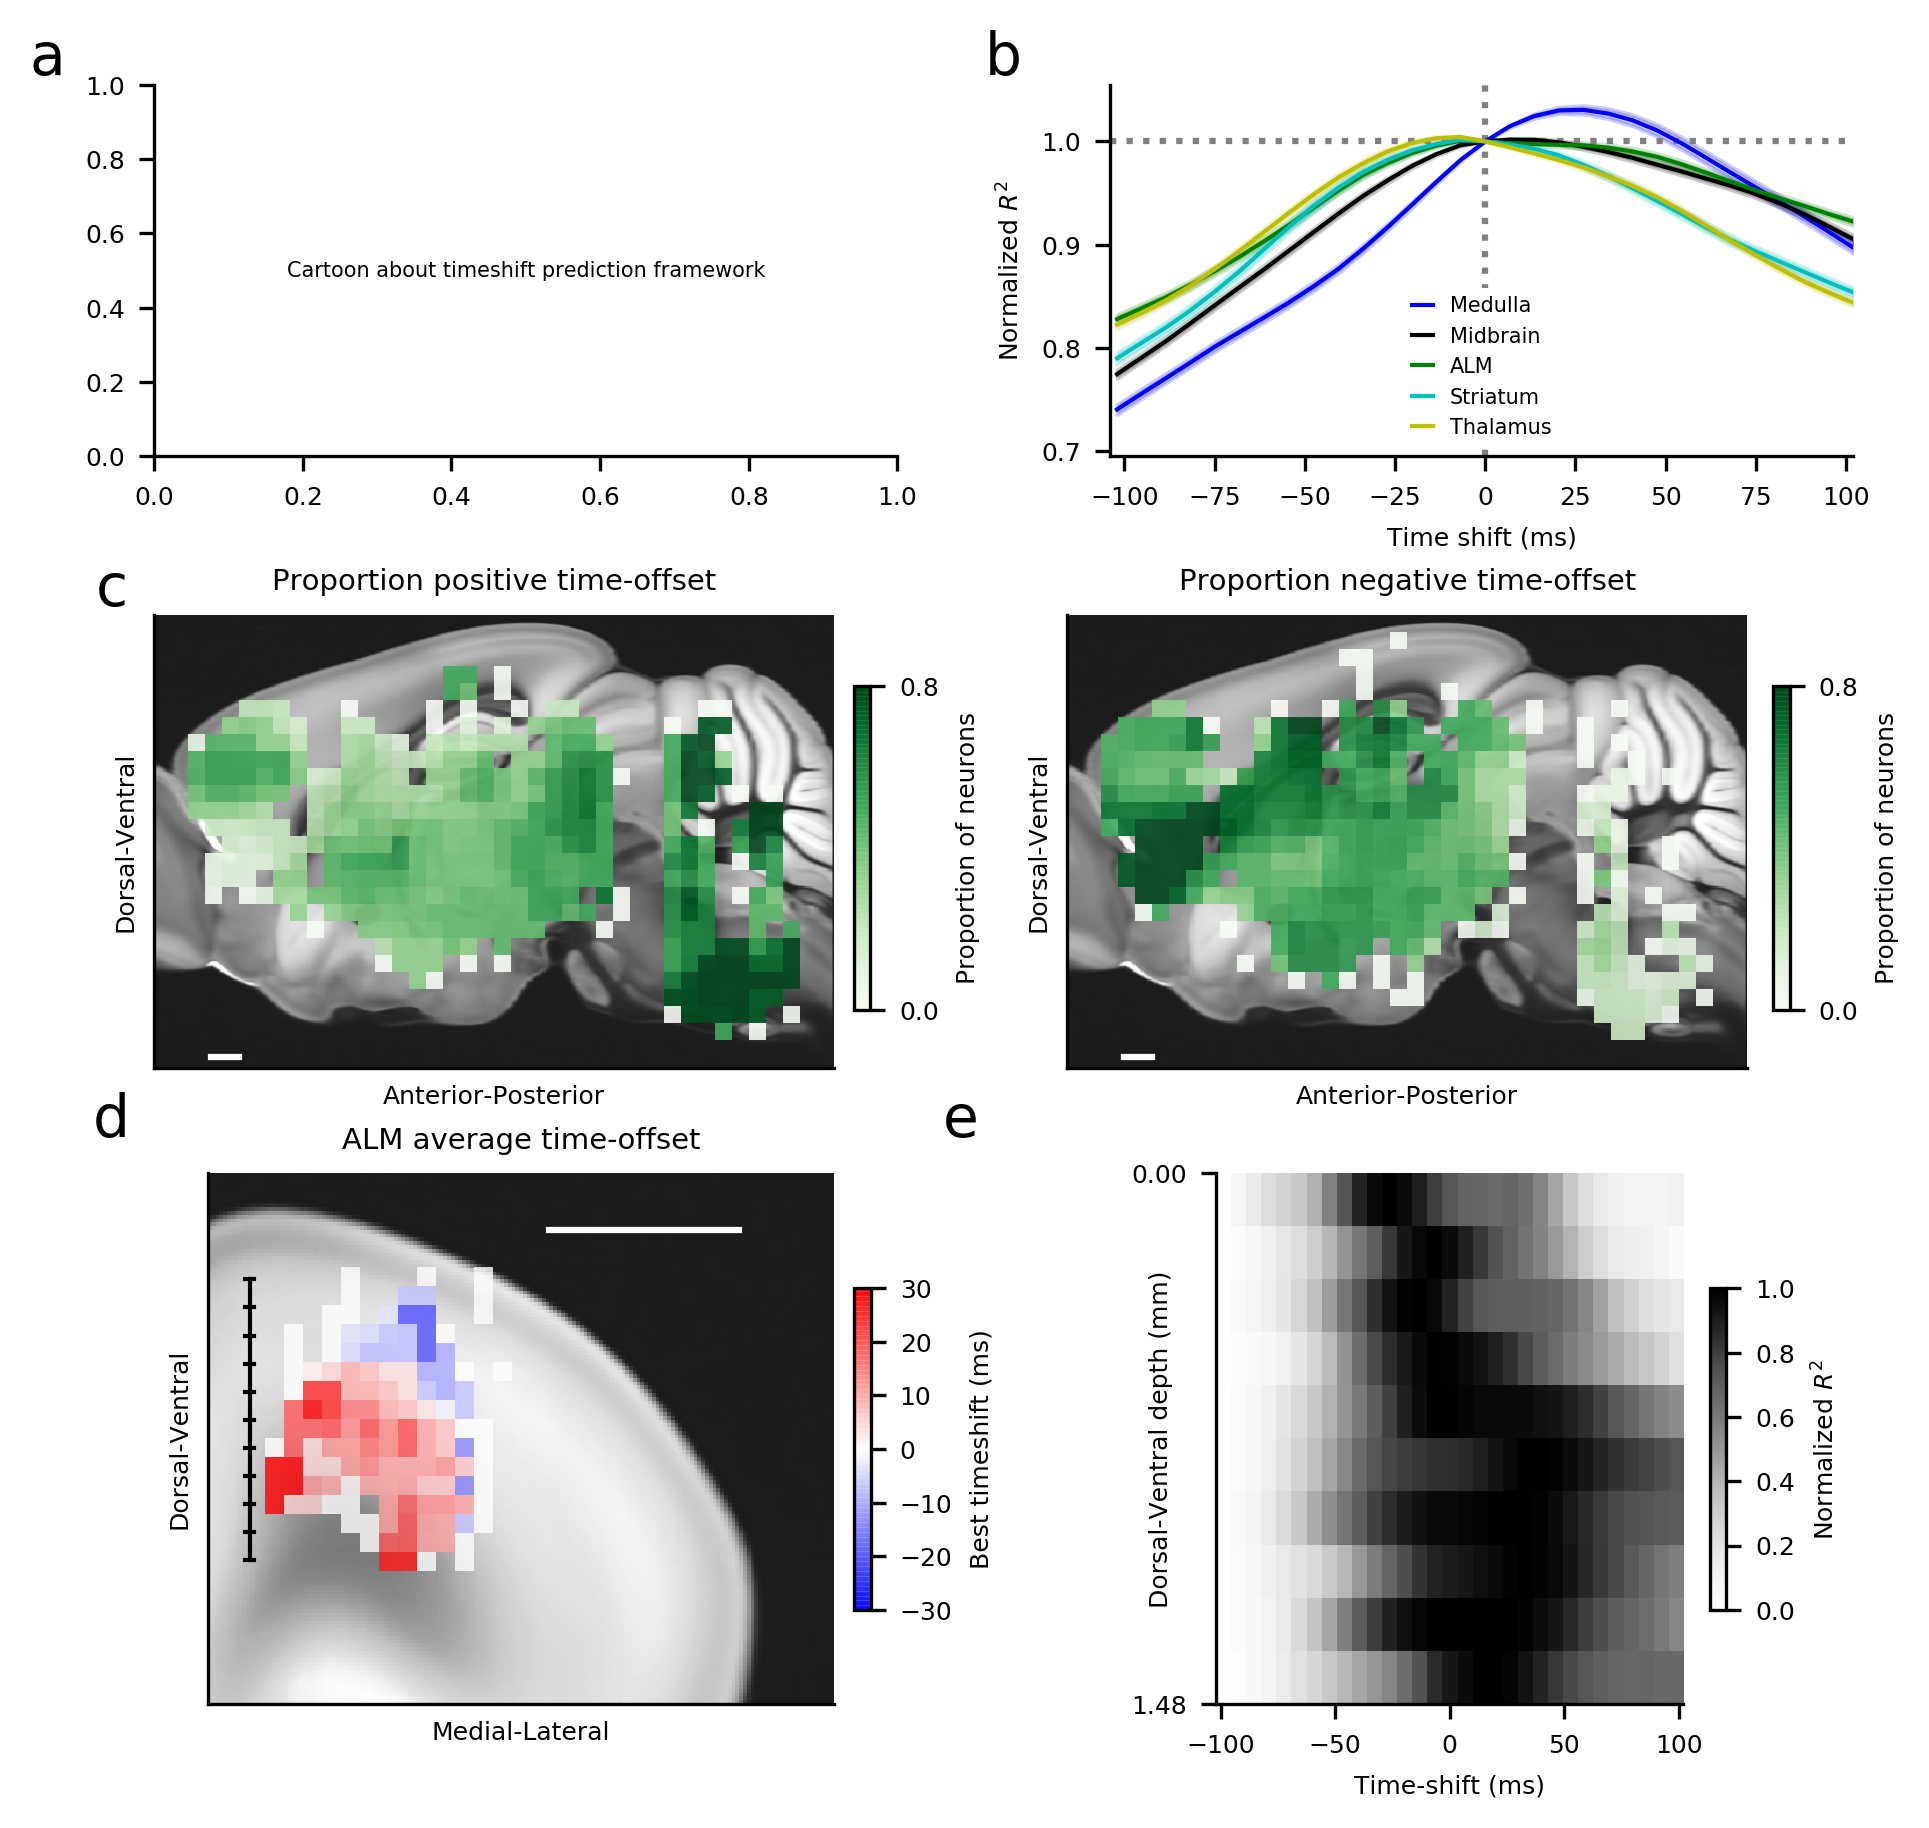

In [13]:
fig3.view_to_vlim['positive fraction'] = [0, 0.8]
fig3.view_to_vlim['negative fraction'] = [0, 0.8]
fig3.plot_fig3_main_v6(alm_depth_angle= 0)
#plt.savefig(main_figfolder + 'figure3_draft_v8.pdf',dpi = 300, bbox_inches='tight')

## Supplementary plots

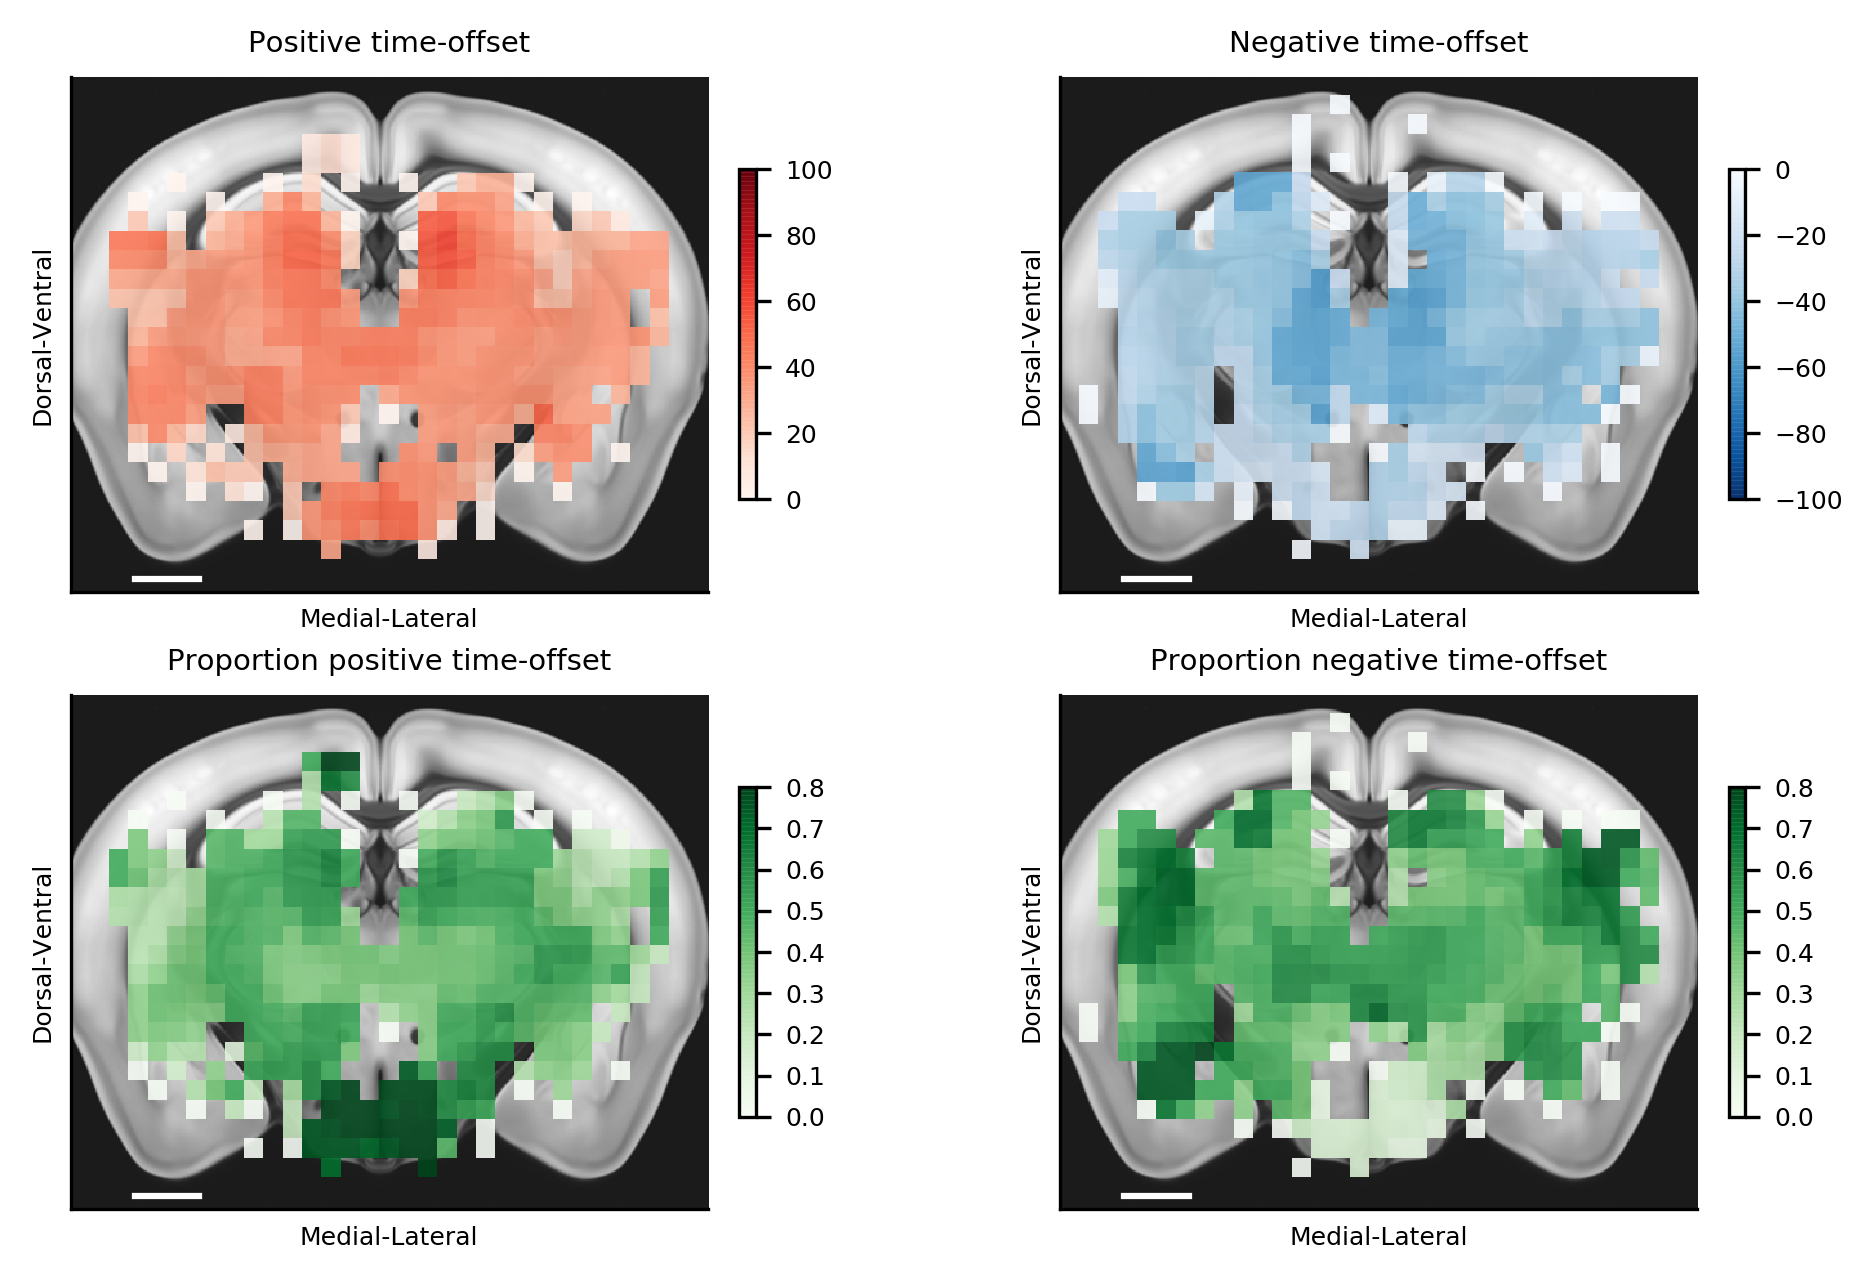

In [14]:
fig3.plot_coronal_heatmaps_supplementary()
#plt.savefig(supplementary_figfolder + 'figure3_coronal_heatmaps_supplementary.pdf', bbox_inches='tight')

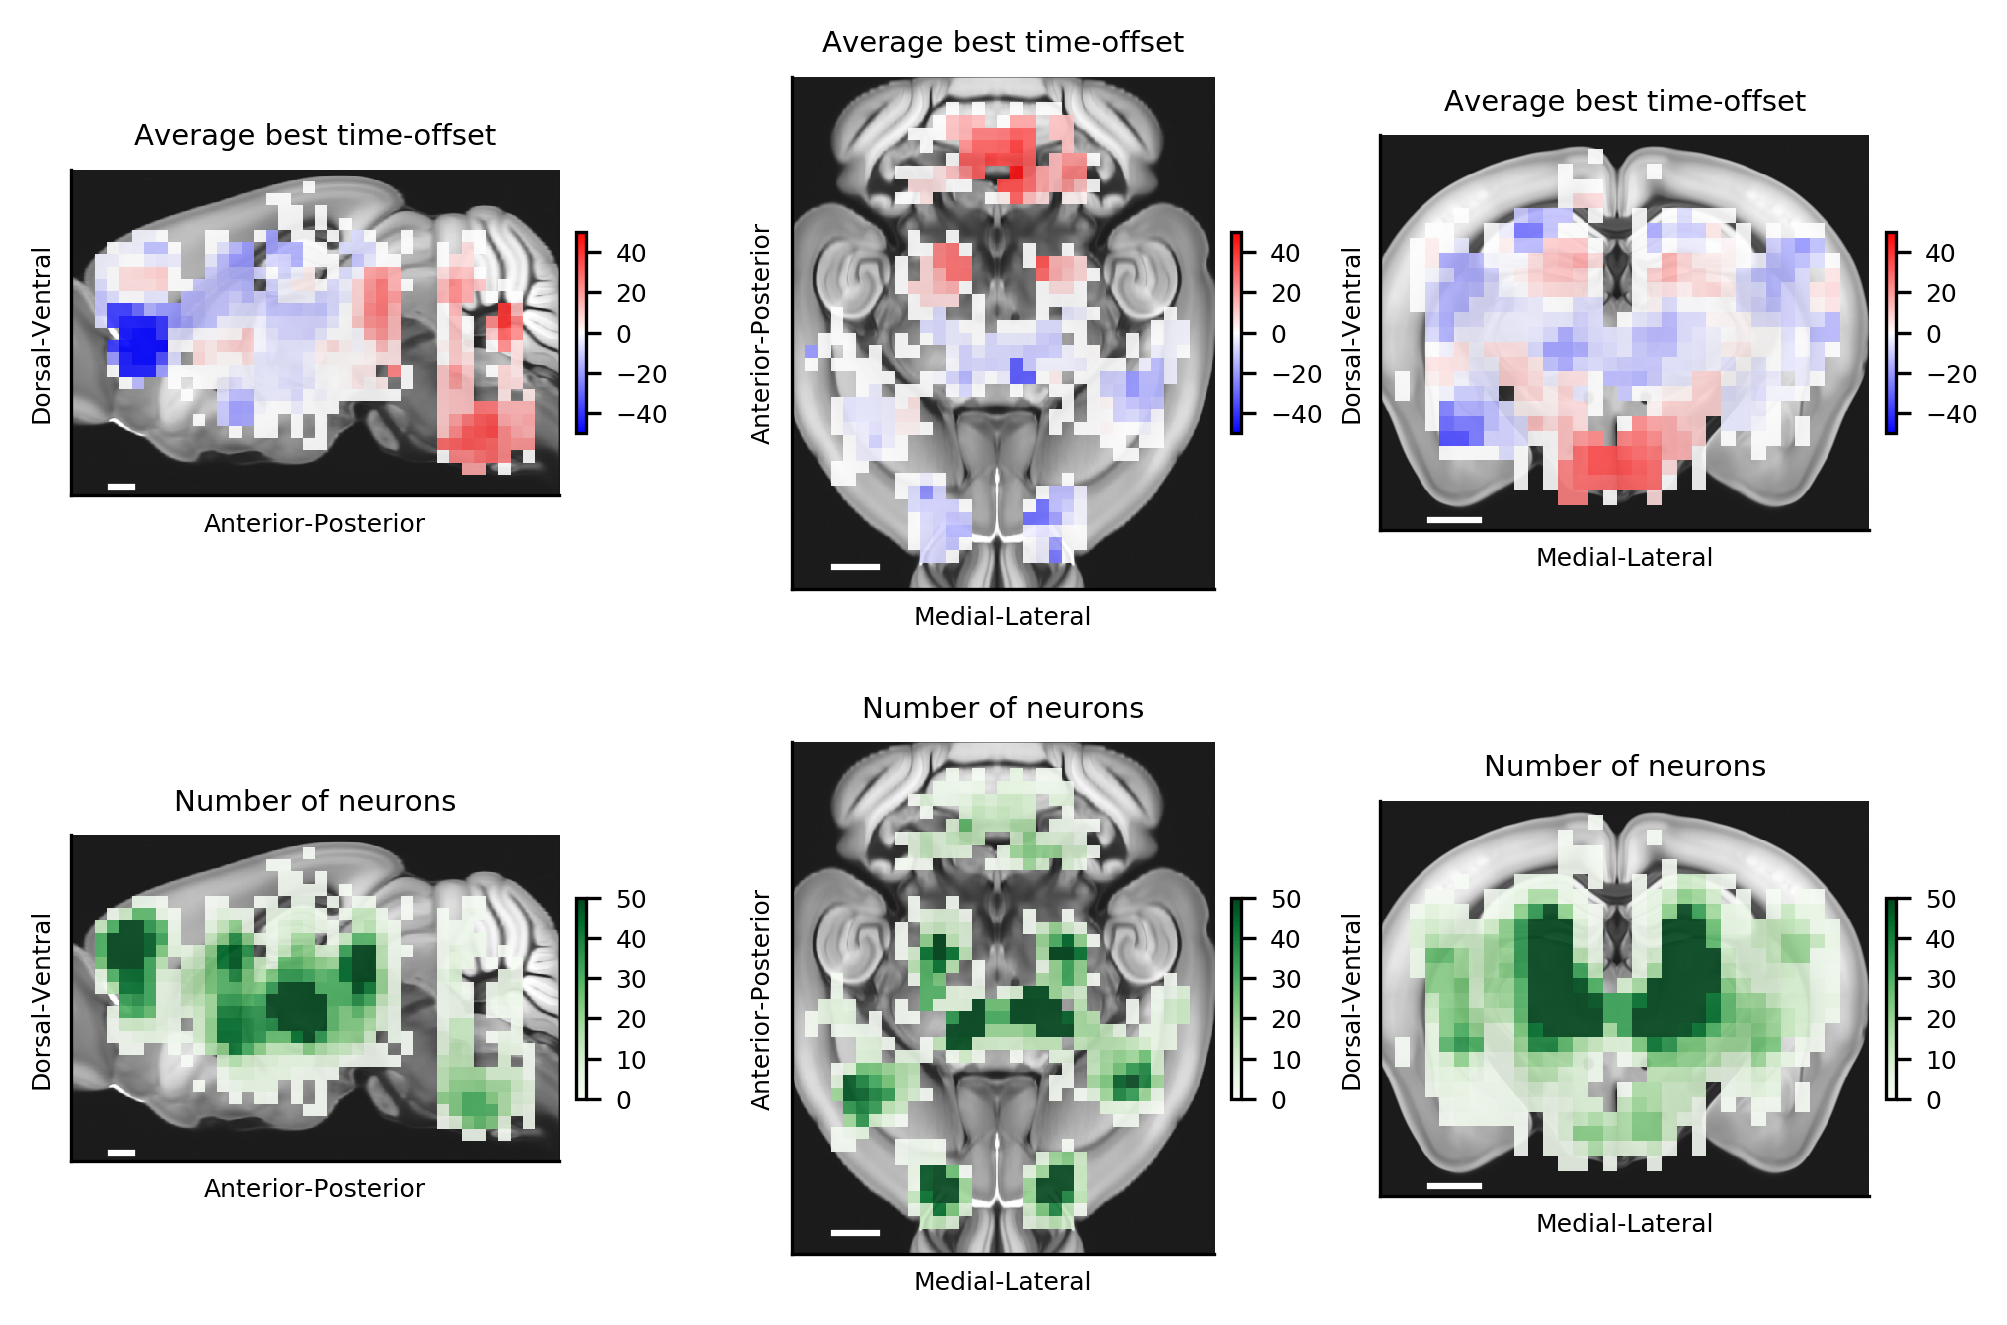

In [15]:
fig3.plot_three_views_average_and_count()
#plt.savefig(supplementary_figfolder + 'figure3_three_views_average_and_count.pdf', bbox_inches='tight')

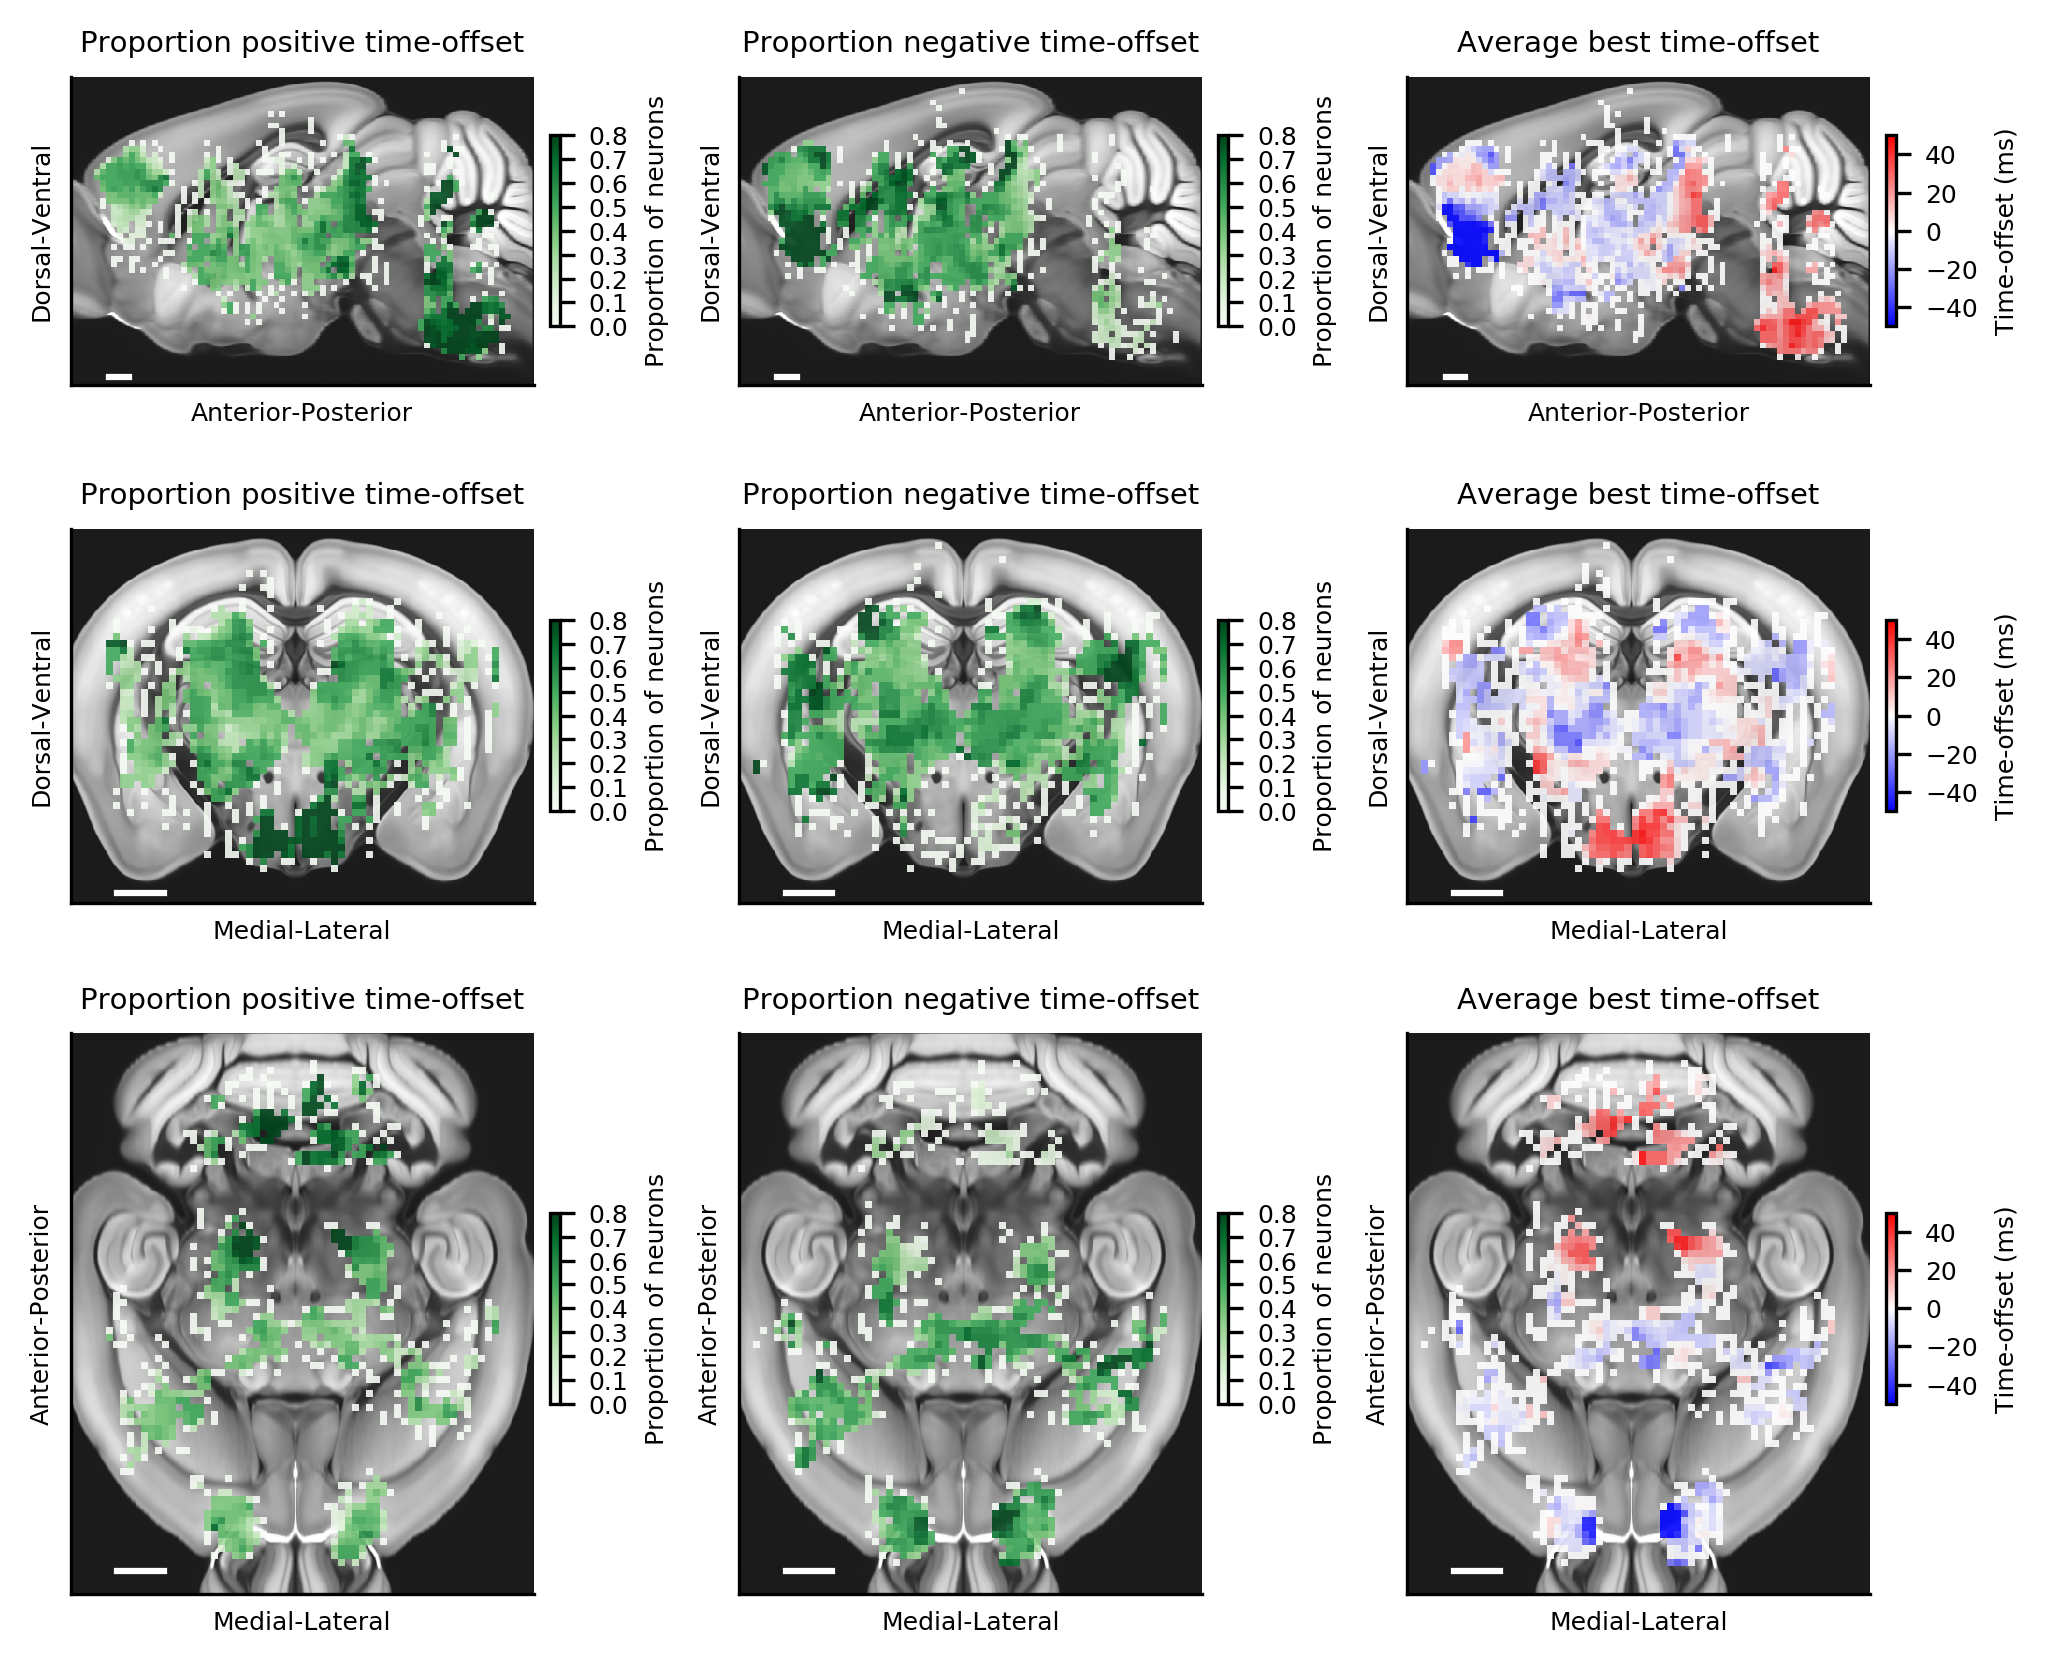

In [16]:
f, axs = plt.subplots(3,3, figsize = (7.8,9))
axs = axs.flatten()
f.subplots_adjust(hspace = 0.1, wspace=0.4)
voxel_size = 150

coronal_shift = 0.08

views = ['positive fraction', 'negative fraction', 'all average']
cbar_titles = ['Proportion of neurons', 'Proportion of neurons', 'Time-offset (ms)']
for i, view in enumerate(views):
    fig3.plot_saggital_heatmap(f, ax = axs[i], view = view, voxel_size= voxel_size, cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i].set_xlabel('Anterior-Posterior')
    axs[i].set_ylabel('Dorsal-Ventral')

    fig3.plot_coronal_heatmap(f, ax = axs[i+3], view = view, voxel_size= voxel_size, cbar_y0_shift = coronal_shift,cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i+3].set_xlabel('Medial-Lateral')
    axs[i+3].set_ylabel('Dorsal-Ventral')

    fig3.plot_horizontal_heatmap(f, ax = axs[i+6], view = view, voxel_size= voxel_size, cbar_y0_shift = 0.12,cbar_x0_shift = 0.005, cbar_title= cbar_titles[i])
    axs[i+6].set_xlabel('Medial-Lateral')
    axs[i+6].set_ylabel('Anterior-Posterior')
    
for ii in range(3,6):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0 + coronal_shift, pos.width, pos.height])

for ii in range(6,9):
    pos = axs[ii].get_position()
    axs[ii].set_position([pos.x0, pos.y0, pos.width, pos.height*2])

#plt.savefig(supplementary_figfolder + 'timeshifts_all_views_heatmaps_voxel%d.pdf'%voxel_size, dpi = 300, bbox_inches='tight')

## Reviewer figures

In [17]:
inds = fig3._get_restriction_inds()
best_times = fig3._get_best_times()[inds]

Wilcoxon signed-rank test: p = 1.16e-01


(0, 1000)

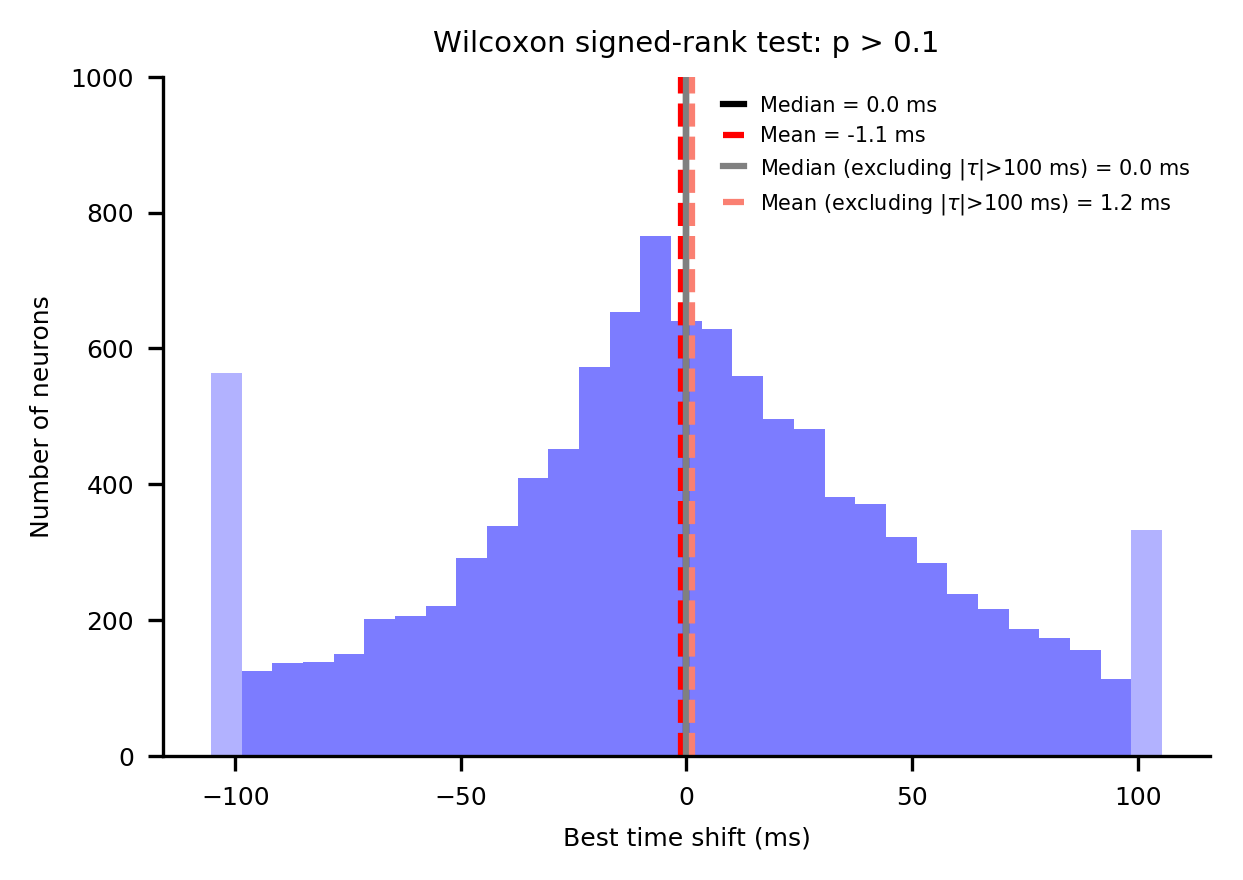

In [18]:
plt.figure(figsize = (4.5,3))

extreme_mask = np.abs(best_times) > 100
median = np.median(best_times)
mean = np.mean(best_times)
exlusion_median = np.median(best_times[~extreme_mask])
exlusion_mean = np.mean(best_times[~extreme_mask])
plt.hist(best_times[~extreme_mask], bins = np.linspace(-105.4,105.4,32), color = 'blue', alpha = 0.3)
plt.hist(best_times, bins = np.linspace(-105.4,105.4,32), color = 'blue', alpha = 0.3)

plt.axvline(median, color = 'k')
plt.axvline(mean, color = 'r', linestyle = '--')
plt.axvline(exlusion_median, color = 'gray')
plt.axvline(exlusion_mean, color = 'salmon', linestyle = '--')
plt.xlabel('Best time shift (ms)')
plt.ylabel('Number of neurons')
plt.legend(['Median = %.1f ms'%median, 'Mean = %.1f ms'%mean,
            r'Median (excluding |$\tau$|>100 ms) = %.1f ms'%exlusion_median,
            r'Mean (excluding |$\tau$|>100 ms) = %.1f ms'%exlusion_mean])
n_positive = np.sum(best_times > 0)
n_negative = np.sum(best_times < 0)
n_total = n_positive + n_negative
p_binom = stats.binom_test(n_positive, n_total, p= 0.5)

stat,p = stats.wilcoxon(best_times)
print('Wilcoxon signed-rank test: p = %.2e'%p)
pstring = 'p = %.2e'%p if p < 0.1 else 'p > 0.1'

plt.title('Wilcoxon signed-rank test: %s'%(pstring))
plt.ylim(0,1000)

#plt.savefig(reviewer_figfolder + 'best_timeshift_histogram_allneurons.png',dpi = 300, bbox_inches='tight')



### Look at other cortical regions

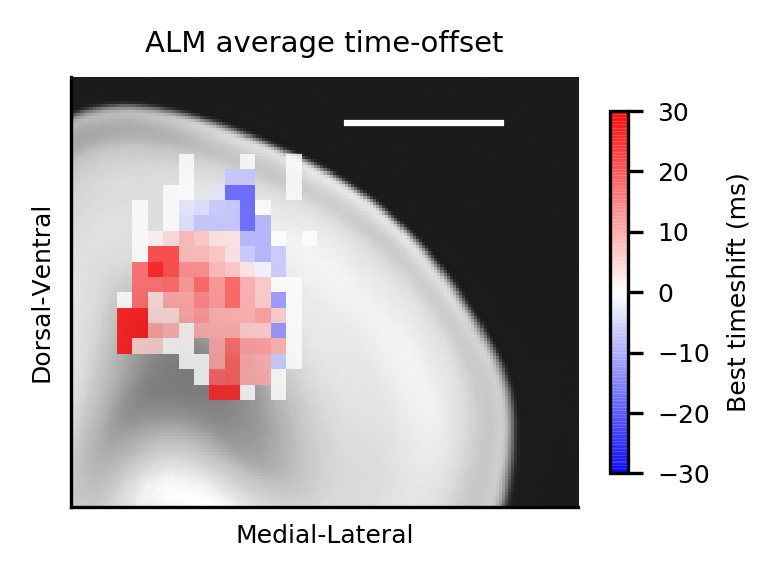

In [19]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = 'ALM')

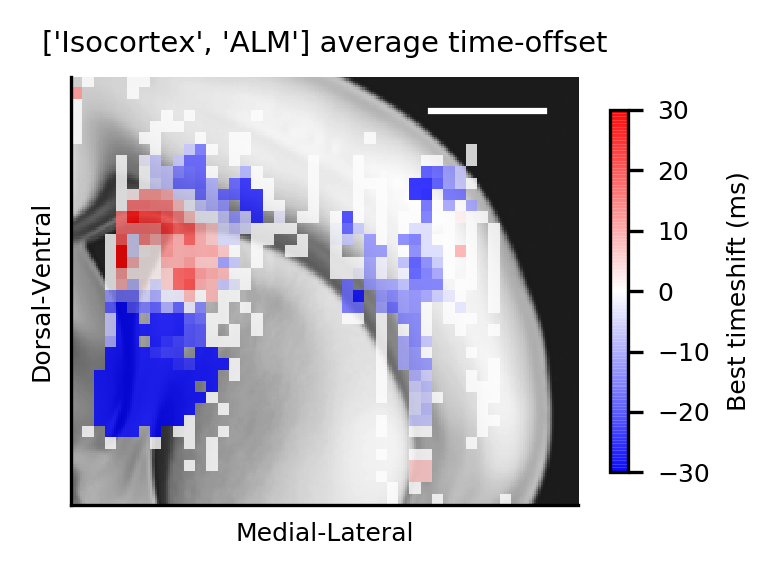

In [20]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = ['Isocortex','ALM'],
                                        ml_lims = [500,5000], dv_lims = [1200,5000], ap_cut = 270)

In [21]:
region_dictionary = {
    'ALM': 'ALM',
    'Somatosensory': 'Somatosensory areas',
    'Somatomotor w/o ALM': 'Somatomotor areas',
    'Orbital': 'Orbital area',
    'Somatomotor + ALM': ['Somatomotor areas','ALM'],
    'Isocortex': ['Isocortex', 'ALM'],
}

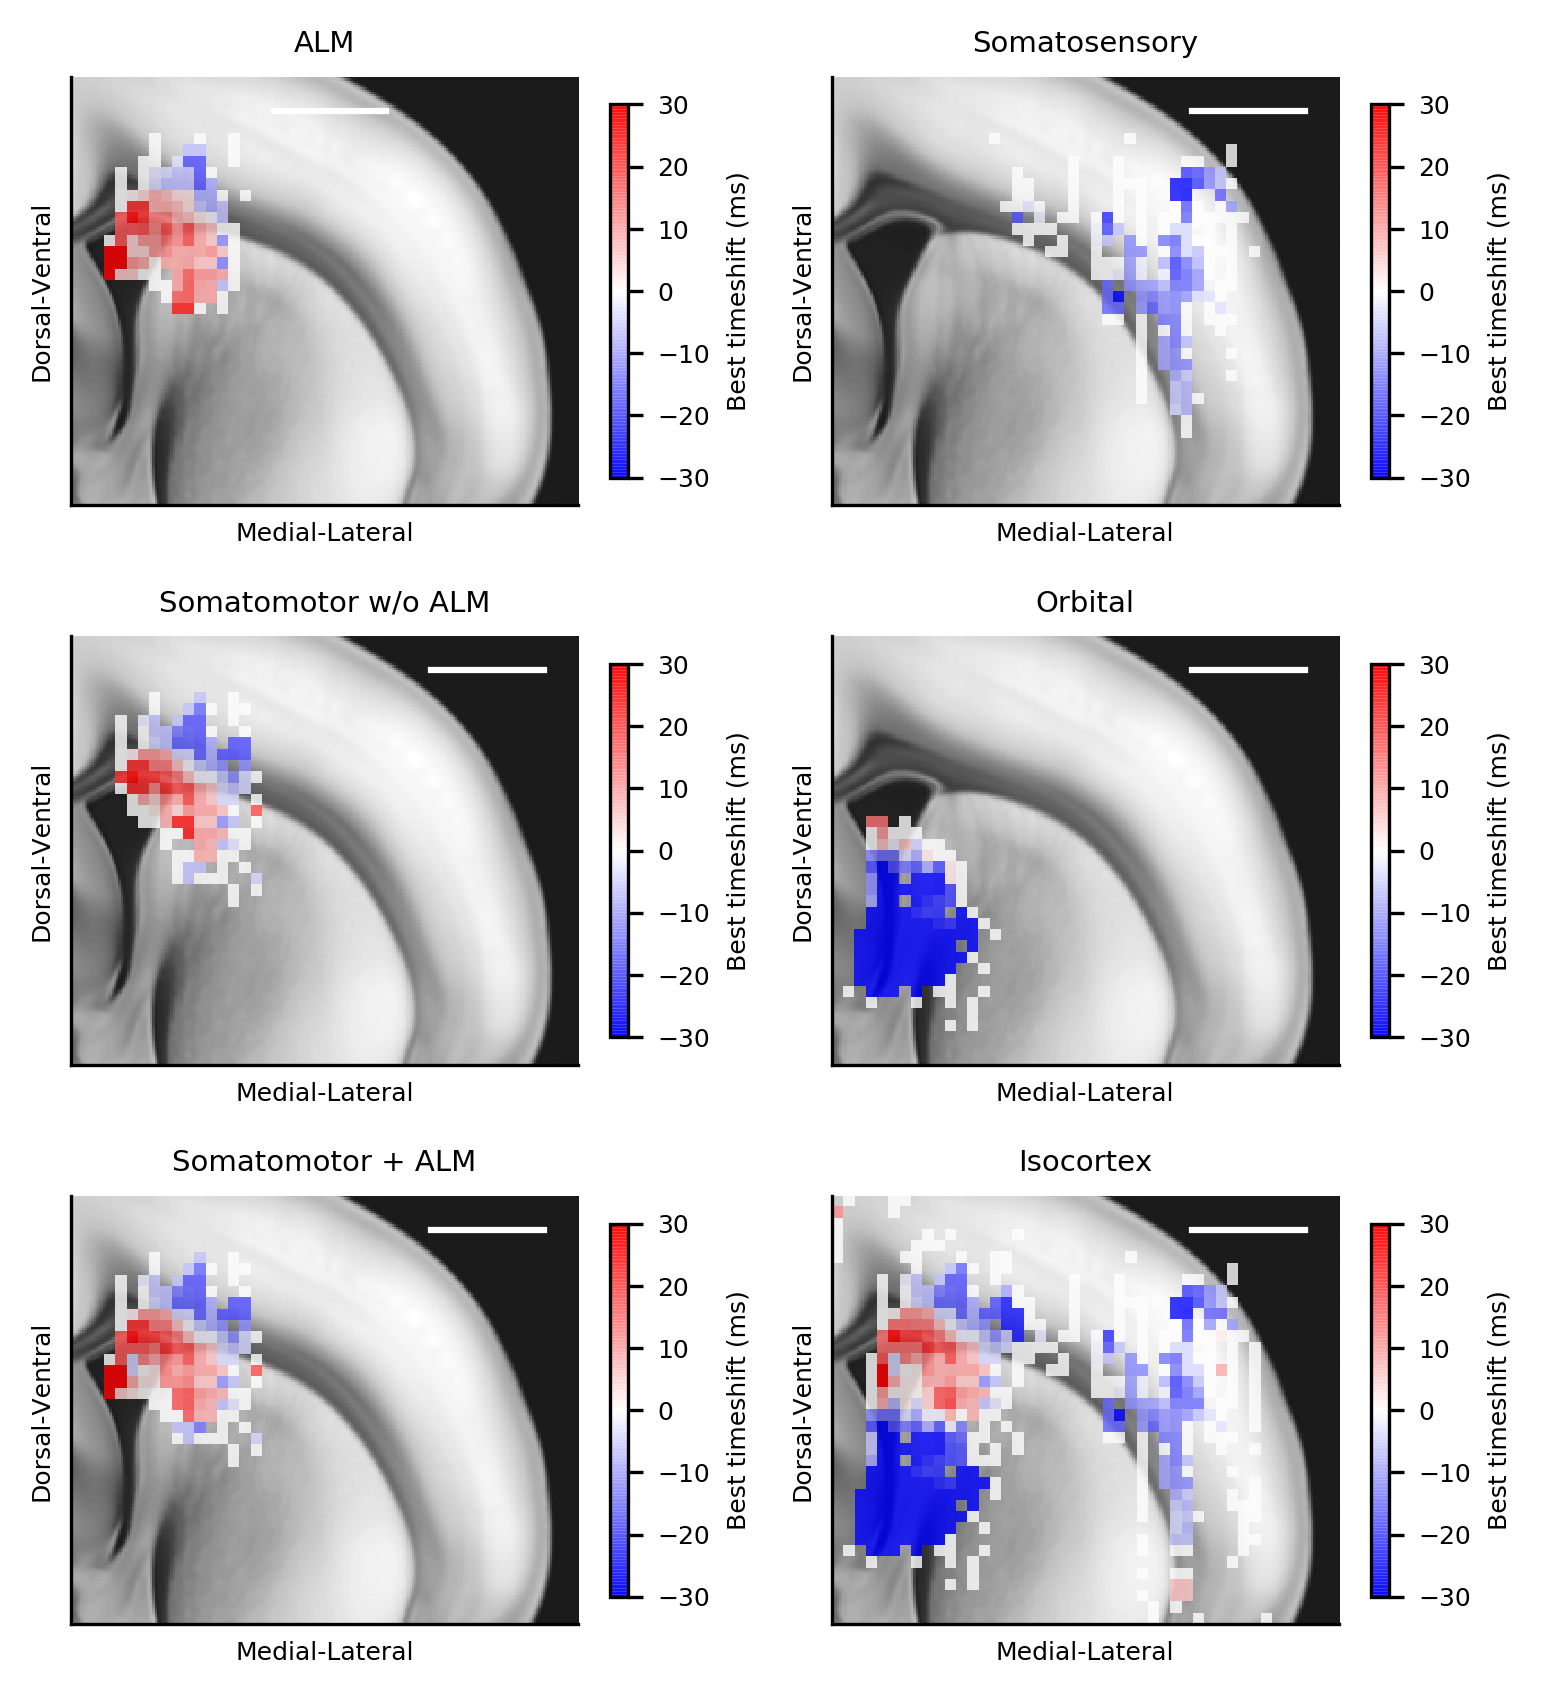

In [22]:
f,ax = plt.subplots(3,2, figsize = (6,7))
ax = ax.flatten()

for i, k,v in zip(range(6), region_dictionary.keys(), region_dictionary.values()):
    fig3.plot_region_best_timeshift_heatmap(f, ax[i], filter_size = 3, region = v,titlestr = k,
                                            ml_lims = [500,5000], dv_lims = [1200,5000], ap_cut = 270)
    
#plt.savefig(supplementary_figfolder + 'best_timeshift_heatmaps_all_cortical_regions.png', bbox_inches='tight')


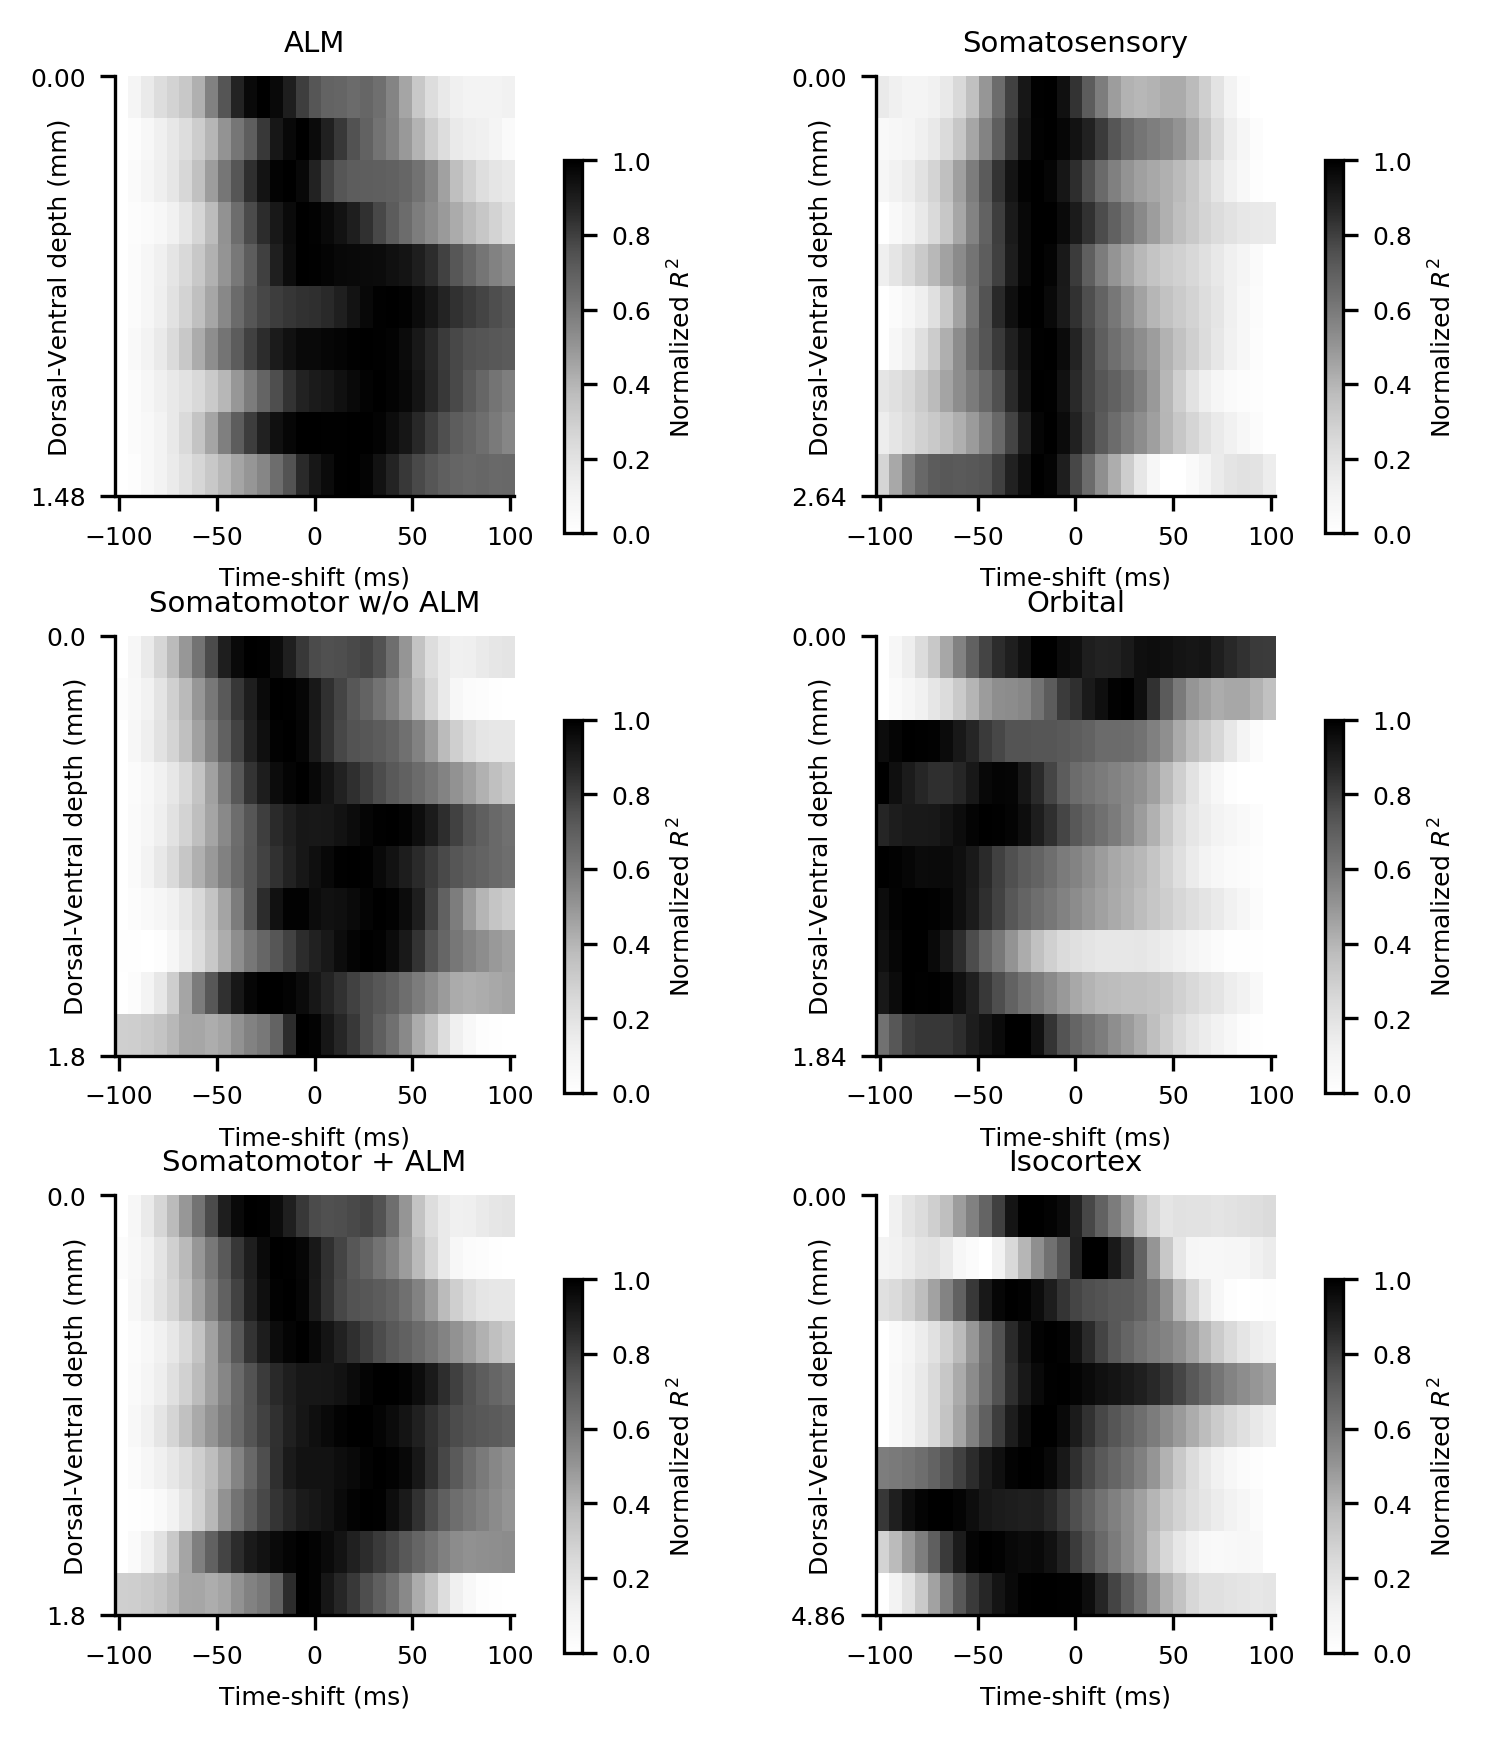

In [23]:
f,ax = plt.subplots(3,2, figsize = (6,7))
ax = ax.flatten()

for i, k,v in zip(range(6), region_dictionary.keys(), region_dictionary.values()):
    fig3.plot_region_depth_r2(f, ax[i], region = v)
    ax[i].set_title(k)

#plt.savefig(supplementary_figfolder + 'depth_r2_all_cortical_regions.png', bbox_inches='tight')

### Adding angle

In [24]:
ccf_labels, ccf_coords, alm_inds = fig3._get_misc_arrays()
alm_coords = ccf_coords[alm_inds] - fig3.global_offset_vec
alm_coords[:,0] = np.abs(alm_coords[:,0])

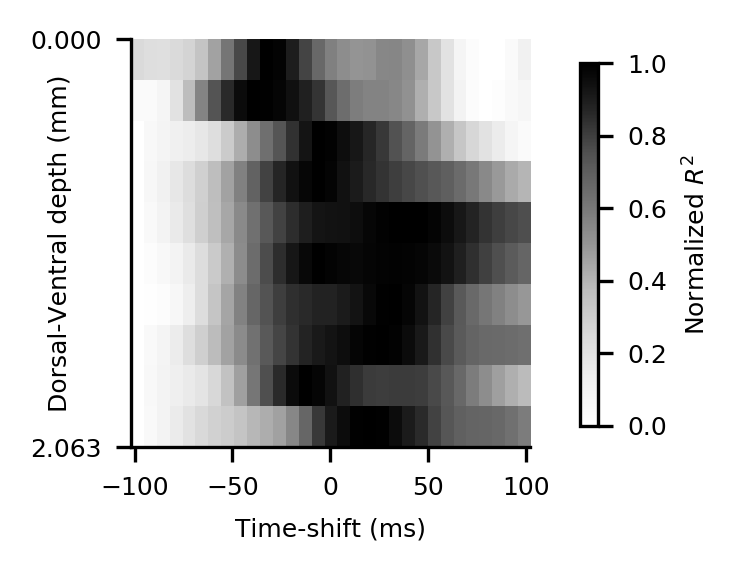

In [25]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_depth_r2(fig, ax1, region = 'ALM', angle = 10)

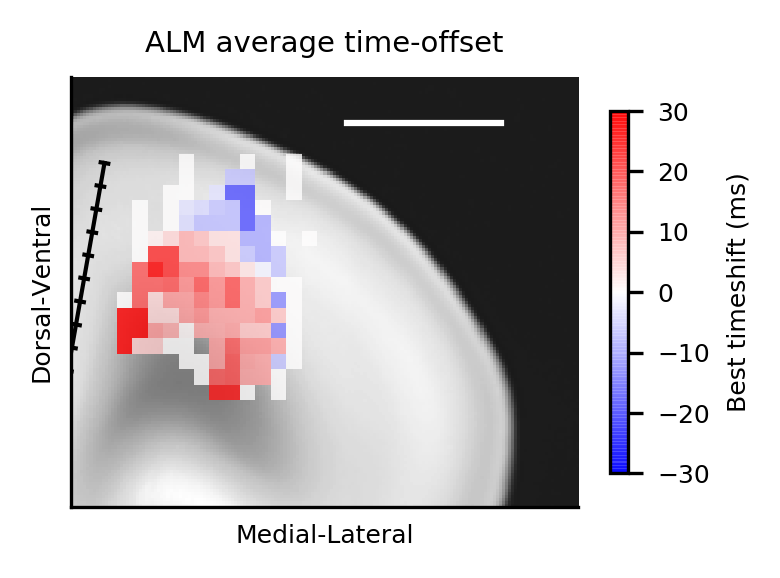

In [26]:
fig = plt.figure(figsize = (6,2))
ax1 = fig.add_subplot(121)
fig3.plot_region_best_timeshift_heatmap(fig, ax1, filter_size = 3, region = 'ALM', angle = 10,depth_line = True)


In [27]:
fig3.get_alm_depth_stats(angle = 10)

Spearman correlation: 0.063, p = 0.04146, n=1059


(0.06266591693113907, 0.041461250248320376)

Spearman correlation: 0.098, p = 0.00139, n=1059
Spearman correlation: 0.083, p = 0.00719, n=1059
Spearman correlation: 0.063, p = 0.04146, n=1059
Spearman correlation: 0.047, p = 0.12990, n=1059
Spearman correlation: 0.039, p = 0.20257, n=1059
Spearman correlation: 0.037, p = 0.23252, n=1059


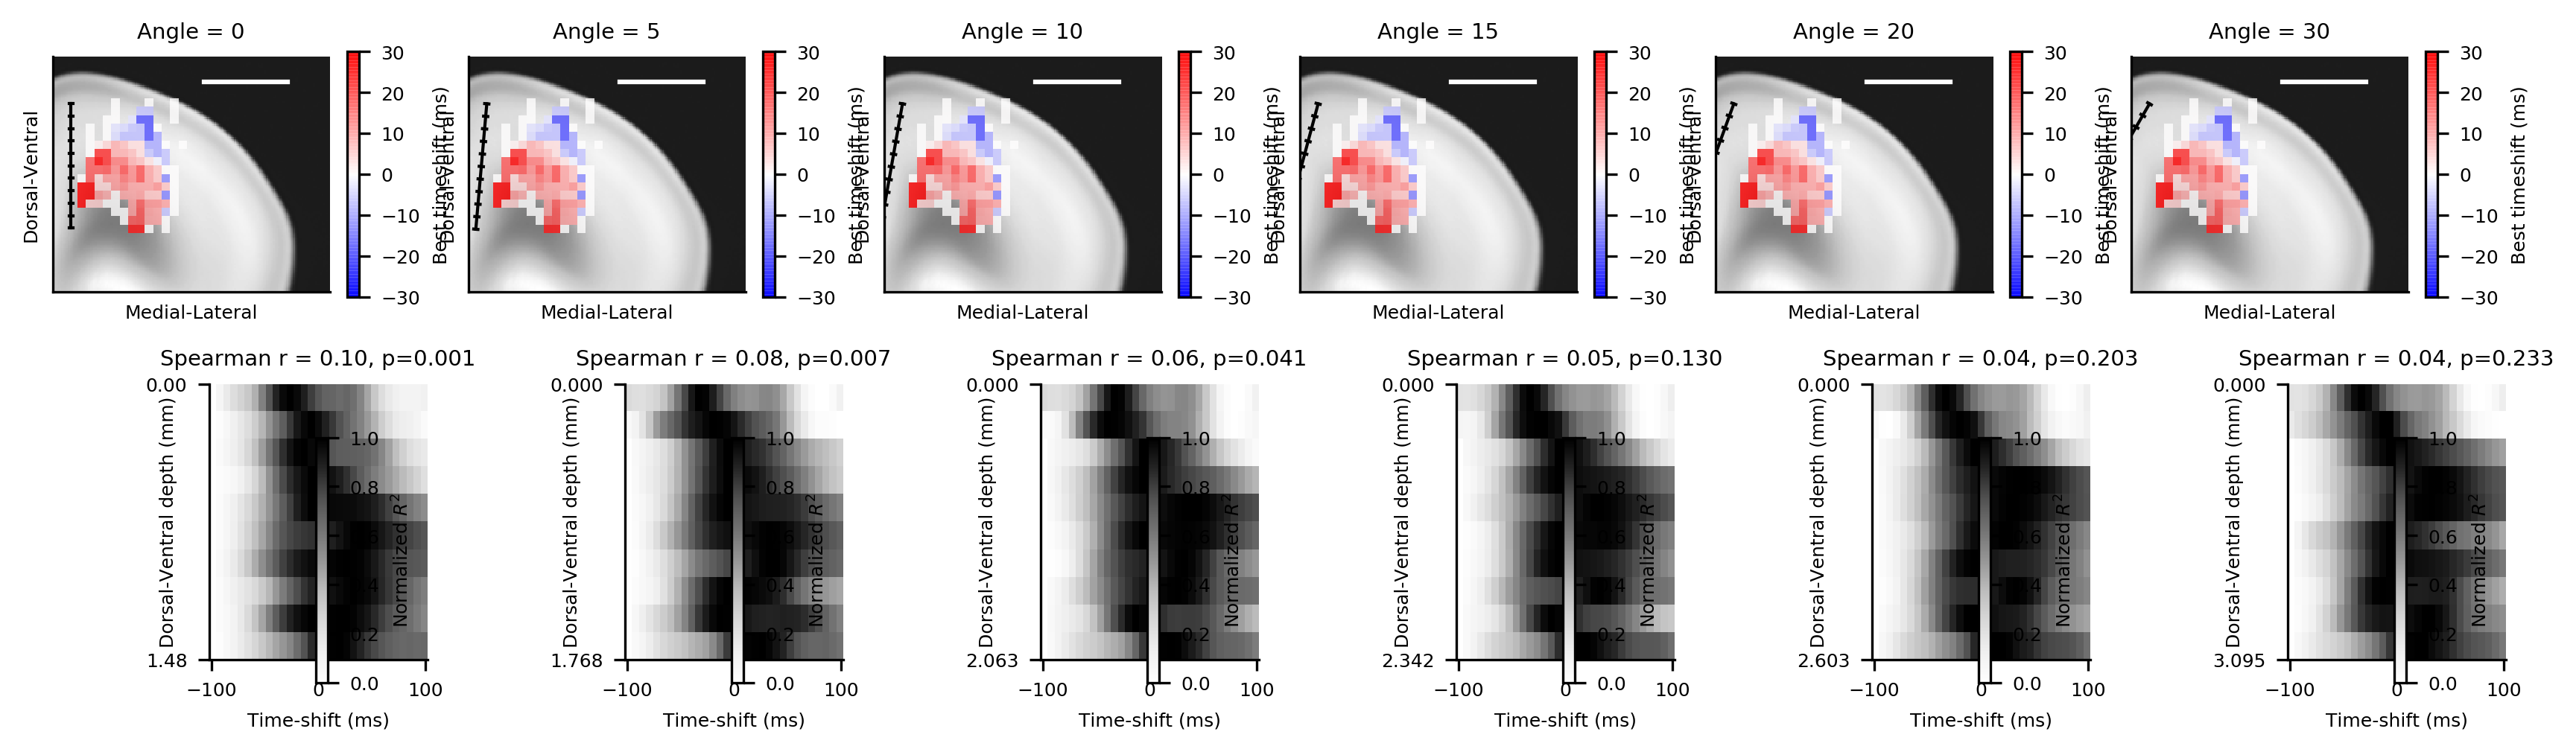

In [28]:
angles = [0,5,10,15,20,30]

fig,axs = plt.subplots(2,len(angles), figsize = (14,4))
axs = axs.flatten()


for i, angle in enumerate(angles):
    
    fig3.plot_region_best_timeshift_heatmap(fig, axs[i], filter_size = 3, region = 'ALM', angle = angle, depth_line = True)
    fig3.plot_region_depth_r2(fig, axs[i+len(angles)], region = 'ALM', angle = angle, cbar_y0_shift  = -0.02,cbar_x0_shift=-0.01)
    spear_r, p = fig3.get_alm_depth_stats(angle = angle)
    axs[i].set_title('Angle = %d'%angle)
    axs[i+len(angles)].set_title('Spearman r = %.2f, p=%.3f'%(spear_r,p))

#plt.savefig(supplementary_figfolder + 'best_timeshift_heatmaps_depth_r2_ALM_angles.png', bbox_inches='tight',dpi = 300)


### Look at cortical layer information of ALM neurons

In [38]:
nbins = 10
r2 = fig3._get_r2_array()

ccf_labels, ccf_coords, alm_inds = fig3._get_misc_arrays()
best_times = fig3._get_best_times()
filtered_inds = fig3._get_restriction_inds()
use_inds = np.intersect1d(filtered_inds, alm_inds)

alm_times = best_times[use_inds]
alm_coords = ccf_coords[use_inds] - fig3.global_offset_vec
alm_labels = ccf_labels[use_inds]

alm_r2 = r2[:,use_inds]
alm_dv_coords = alm_coords[:,1]
min_alm_dv = alm_dv_coords.min()
max_alm_dv = alm_dv_coords.max()

alm_dv_coord_bins = np.linspace(min_alm_dv, max_alm_dv, nbins + 1)

r2_traces_by_dv = []
label_by_dv = []
mean_best_times_by_dv=[]


for ii in range(nbins):
    inds = np.where((alm_dv_coords >= alm_dv_coord_bins[ii]) & (alm_dv_coords < alm_dv_coord_bins[ii+1]))[0]
    r2_traces_by_dv.append(alm_r2[:,inds])
    label_by_dv.append(alm_labels[inds])
    mean_best_times_by_dv.append(alm_times[inds].mean())


In [41]:
unique_layer_types = np.unique([label.lower().split('layer ')[-1] for label in alm_labels])

layer_counts_by_dv = []

for ii in range(nbins):
    layer_counts_by_dv.append({})
    for label in unique_layer_types:
        layer_counts_by_dv[ii][label] = np.sum([1 for l in label_by_dv[ii] if l.endswith(label)])

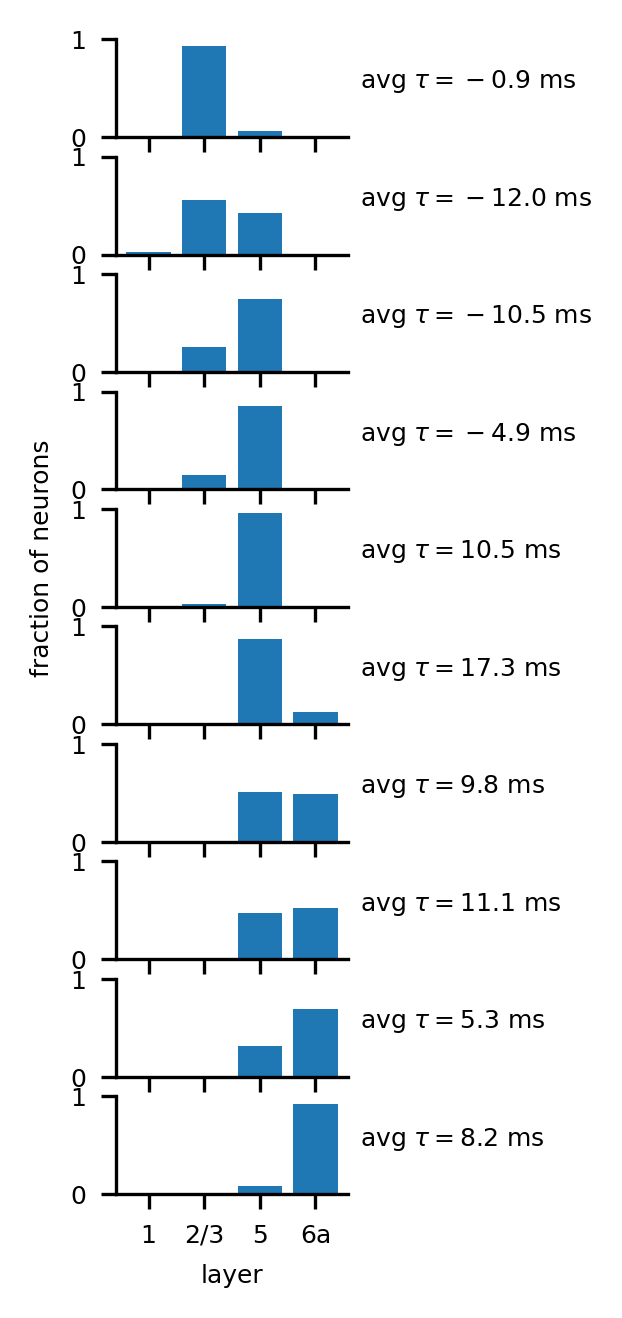

In [65]:
f, axs = plt.subplots(10,1, figsize = (1,5))

axs = axs.flatten()

for ii in range(nbins):
    counts = np.array(list(layer_counts_by_dv[ii].values()))
    axs[ii].bar(np.arange(4),counts/np.sum(counts))
    axs[ii].set_xticks(np.arange(4))
    axs[ii].set_xticklabels(unique_layer_types)
    axs[ii].set_ylim(0,1)
    axs[ii].set_xlabel("layer")
    axs[ii].text(3.8,0.5,r'avg $\tau=%.1f$ ms'%mean_best_times_by_dv[ii], fontsize = 6)
    if ii == 4: axs[ii].set_ylabel('fraction of neurons')
    #if ii == 0: axs[ii].text(1,1.1,'superficial', fontsize = 6)
    #if ii == 9: axs[ii].text(1,0.8,'deep', fontsize = 6)

plt.savefig(reviewer_figfolder + 'alm_layers_by_depth.png', dpi = 300, bbox_inches = 'tight')

In [68]:
layer_inds = {}

for label in unique_layer_types:
    layer_inds[label]=np.array([0 + 1*l.endswith(label) for l in alm_labels])

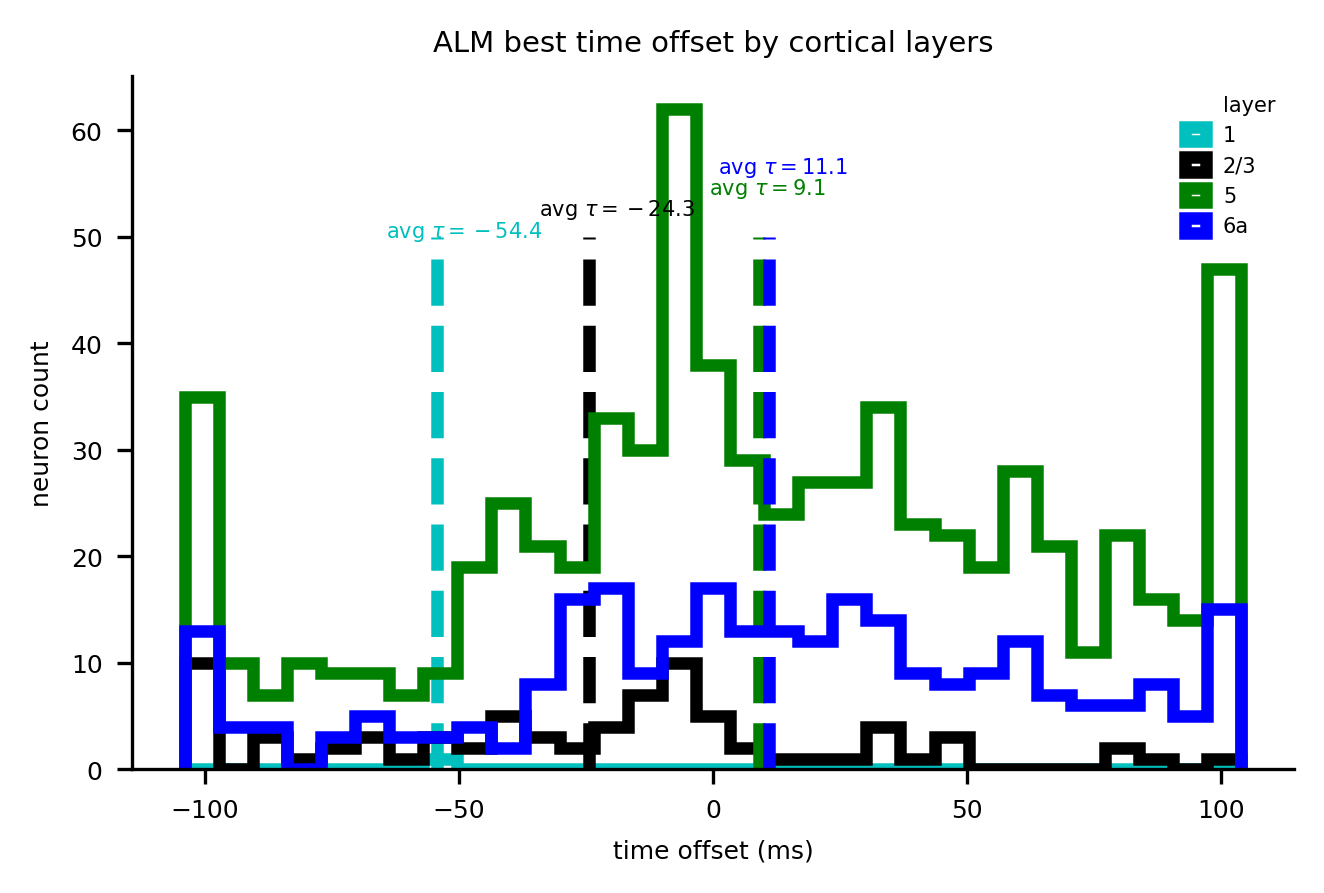

In [110]:
plt.figure(figsize = (5,3))
cols = ['c','k','g','b']
plt.plot([],[],' ',label='layer')
for i,(layerlabel,inds) in enumerate(layer_inds.items()):
    times = alm_times[inds==1]
    
    plt.hist(times, bins=np.linspace(-104,104,32), alpha = 1,color = cols[i], label= layerlabel,histtype='step',linewidth = 3)
    mean_t = np.mean(times)
    plt.plot([mean_t,mean_t],[0,50],'--',color = cols[i],linewidth = 3)
    plt.text(mean_t-10,50+2*i, r'avg $\tau=%.1f$'%mean_t, color = cols[i],fontsize = 5)
    plt.legend()
plt.xlabel('time offset (ms)')
plt.ylabel('neuron count')
plt.title('ALM best time offset by cortical layers')

plt.savefig(reviewer_figfolder + 'alm_best_timeoffset_histograms_by_layer.png', dpi = 300, bbox_inches = 'tight')
